#Connecting Datasets from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Datsets and Cleaning Data

## 1st Dataset

Importing 1st Dataset (Daily Activity) and Examine the Data Information

In [ ]:
# Importing Daily Activity dataset
daily_activity = pd.read_csv('/content/drive/MyDrive/Project Study Case 2/Datasets/dailyActivity_merged.csv', delimiter=',', on_bad_lines='skip')

# Examining the first few lines of data
print("\nFirst Five Lines of Data:")
print(daily_activity.head())

# Information about data types and encoding schemes
print("\nData Information:")
print(daily_activity.info())

# Descriptive statistics for numerical data
print("\nDescriptive Statistics:")
print(daily_activity.describe())

# Checking for Duplicate Data
duplicate_rows_daily_activity = daily_activity.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_rows_daily_activity}")


First Five Lines of Data:
           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    4/12/2016       13162           8.50             8.50   
1  1503960366    4/13/2016       10735           6.97             6.97   
2  1503960366    4/14/2016       10460           6.74             6.74   
3  1503960366    4/15/2016        9762           6.28             6.28   
4  1503960366    4/16/2016       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinute

Cleaning 1st Dataframe (Daily Activity)

In [ ]:
# Trimming whitespace from all string columns in the DataFrame
for col in daily_activity.columns:
  if daily_activity[col].dtype == 'object':
    daily_activity[col] = daily_activity[col].str.strip()

# Change the data type in the ActivityDate column to a time data type.
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'])

# Creating a new column called "ActivityDay" that extracts the day of the week from the "ActivityDate" column.
daily_activity['ActivityDay'] = pd.to_datetime(daily_activity['ActivityDate'], format='%m/%d/%Y').dt.day_name()

# Previewing Data Head After Data Type Cleaning
print("\nFirst Five Rows of Data After Data Cleaning")
print(daily_activity.head())

# Post-Cleaning Data Overview:
print("\nPost-Cleaning Data Details:")
print(daily_activity.info())


First Five Rows of Data After Data Cleaning
           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366   2016-04-12       13162           8.50             8.50   
1  1503960366   2016-04-13       10735           6.97             6.97   
2  1503960366   2016-04-14       10460           6.74             6.74   
3  1503960366   2016-04-15        9762           6.28             6.28   
4  1503960366   2016-04-16       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance

## 2nd Dataset

Importing 2nd Dataset (Daily Sleep) and Examine the Data Information

In [ ]:
# Reading CSV File
daily_sleep = pd.read_csv('/content/drive/MyDrive/Project Study Case 2/Datasets/sleepDay_merged.csv', delimiter=',', on_bad_lines='skip')

# Examining the first few lines of data
print("\nFirst Five Lines of Data:")
print(daily_sleep.head())

# Information about data types and encoding schemes
print("\nData Information:")
print(daily_sleep.info())

# Descriptive statistics for numerical data
print("\nDescriptive Statistics:")
print(daily_sleep.describe())

# Checking for Duplicate Data
duplicate_rows_daily_sleep = daily_sleep.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_rows_daily_sleep}")


First Five Lines of Data:
           Id               SleepDay  TotalSleepRecords  TotalMinutesAsleep  \
0  1503960366  4/12/2016 12:00:00 AM                  1                 327   
1  1503960366  4/13/2016 12:00:00 AM                  2                 384   
2  1503960366  4/15/2016 12:00:00 AM                  1                 412   
3  1503960366  4/16/2016 12:00:00 AM                  2                 340   
4  1503960366  4/17/2016 12:00:00 AM                  1                 700   

   TotalTimeInBed  
0             346  
1             407  
2             442  
3             367  
4             712  

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinut

Cleaning 2nd Dataframe (Daily Sleep)

In [ ]:
# Trimming whitespace from all string columns in the DataFrame
for col in daily_sleep.columns:
  if daily_sleep[col].dtype == 'object':
    daily_sleep[col] = daily_sleep[col].str.strip()

# Removing Duplicate Data from daily_sleep
daily_sleep_cleaned = daily_sleep.drop_duplicates()

# Re-checking for duplicate data after removal
duplicate_rows_daily_sleep_after_drop = daily_sleep_cleaned.duplicated().sum()
print(f"\nNumber of Duplicate Rows in daily_sleep After Removal: {duplicate_rows_daily_sleep_after_drop}")

# daily_sleep_cleaned now contains the enhanced, deduplicated data. We can now replace daily_sleep with daily_sleep_cleaned to ensure data integrity.
daily_sleep = daily_sleep_cleaned

# Previewing Data Head After Data Type Cleaning
print("\nFirst Five Rows of Data After Data Cleaning")
print(daily_sleep.head())

# Post-Cleaning Data Overview:
print("\nPost-Cleaning Data Details:")
print(daily_sleep.info())


Number of Duplicate Rows in daily_sleep After Removal: 0

First Five Rows of Data After Data Cleaning
           Id               SleepDay  TotalSleepRecords  TotalMinutesAsleep  \
0  1503960366  4/12/2016 12:00:00 AM                  1                 327   
1  1503960366  4/13/2016 12:00:00 AM                  2                 384   
2  1503960366  4/15/2016 12:00:00 AM                  1                 412   
3  1503960366  4/16/2016 12:00:00 AM                  2                 340   
4  1503960366  4/17/2016 12:00:00 AM                  1                 700   

   TotalTimeInBed  
0             346  
1             407  
2             442  
3             367  
4             712  

Post-Cleaning Data Details:
<class 'pandas.core.frame.DataFrame'>
Index: 410 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  410 non-null    int64 
 1   SleepDay            410 n

## 3rd Dataset

Importing 3rd Dataset (Heart Rate) and Examine the Data Information

In [ ]:
# Reading CSV File
heart_rate = pd.read_csv('/content/drive/MyDrive/Project Study Case 2/Datasets/heartrate_seconds_merged.csv', delimiter=',', on_bad_lines='skip')

# Examining the first few lines of data
print("\nFirst Five Lines of Data:")
print(heart_rate.head())

# Information about data types and encoding schemes
print("\nData Information:")
print(heart_rate.info())

# Descriptive statistics for numerical data
print("\nDescriptive Statistics:")
print(heart_rate.describe())

# Checking for Duplicate Data
duplicate_rows_heart_rate = heart_rate.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_rows_heart_rate}")


First Five Lines of Data:
           Id                  Time  Value
0  2022484408  4/12/2016 7:21:00 AM     97
1  2022484408  4/12/2016 7:21:05 AM    102
2  2022484408  4/12/2016 7:21:10 AM    105
3  2022484408  4/12/2016 7:21:20 AM    103
4  2022484408  4/12/2016 7:21:25 AM    101

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Time    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ MB
None

Descriptive Statistics:
                 Id         Value
count  2.483658e+06  2.483658e+06
mean   5.513765e+09  7.732842e+01
std    1.950224e+09  1.940450e+01
min    2.022484e+09  3.600000e+01
25%    4.388162e+09  6.300000e+01
50%    5.553957e+09  7.300000e+01
75%    6.962181e+09  8.800000e+01
max    8.877689e+09  2.030000e+02

Number of Duplicate Rows: 0


Cleaning 3rd Dataframe (Heart Rate)

In [ ]:
# Trimming whitespace from all string columns in the DataFrame
for col in heart_rate.columns:
  if heart_rate[col].dtype == 'object':
    heart_rate[col] = heart_rate[col].str.strip()

# Removing Duplicate Data from heart_rate
heart_rate_cleaned = heart_rate.drop_duplicates()

# Re-checking for duplicate data after removal
duplicate_rows_heart_rate_after_drop = heart_rate_cleaned.duplicated().sum()
print(f"\nNumber of Duplicate Rows in heart_rate After Removal: {duplicate_rows_heart_rate_after_drop}")

# Renaming the “Value” column to “heartrate”
heart_rate_cleaned = heart_rate.rename(columns={'Value': 'heartrate'})

# heart_rate_cleaned now contains the enhanced, deduplicated data. We can now replace heart_rate with heart_rate_cleaned to ensure data integrity.
heart_rate = heart_rate_cleaned

# Previewing Data Head After Data Type Cleaning
print("\nFirst Five Rows of Data After Data Cleaning")
print(heart_rate.head())

# Post-Cleaning Data Overview:
print("\nPost-Cleaning Data Details:")
print(heart_rate.info())


Number of Duplicate Rows in heart_rate After Removal: 0

First Five Rows of Data After Data Cleaning
           Id                  Time  heartrate
0  2022484408  4/12/2016 7:21:00 AM         97
1  2022484408  4/12/2016 7:21:05 AM        102
2  2022484408  4/12/2016 7:21:10 AM        105
3  2022484408  4/12/2016 7:21:20 AM        103
4  2022484408  4/12/2016 7:21:25 AM        101

Post-Cleaning Data Details:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   Id         int64 
 1   Time       object
 2   heartrate  int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ MB
None


## 4th Dataset

Importing 4th Dataset (Hourly Calories) and Examine the Data Information

In [ ]:
# Reading CSV File
hourly_calories = pd.read_csv('/content/drive/MyDrive/Project Study Case 2/Datasets/hourlyCalories_merged.csv', delimiter=',', on_bad_lines='skip')

# Examining the first few lines of data
print("\nFirst Five Lines of Data:")
print(hourly_calories.head())

# Information about data types and encoding schemes
print("\nData Information:")
print(hourly_calories.info())

# Descriptive statistics for numerical data
print("\nDescriptive Statistics:")
print(hourly_calories.describe())

# Checking for Duplicate Data
duplicate_rows_hourly_calories = hourly_calories.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_rows_hourly_calories}")


First Five Lines of Data:
           Id           ActivityHour  Calories
0  1503960366  4/12/2016 12:00:00 AM        81
1  1503960366   4/12/2016 1:00:00 AM        61
2  1503960366   4/12/2016 2:00:00 AM        59
3  1503960366   4/12/2016 3:00:00 AM        47
4  1503960366   4/12/2016 4:00:00 AM        48

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   Calories      22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB
None

Descriptive Statistics:
                 Id      Calories
count  2.209900e+04  22099.000000
mean   4.848235e+09     97.386760
std    2.422500e+09     60.702622
min    1.503960e+09     42.000000
25%    2.320127e+09     63.000000
50%    4.445115e+09     83.000000
75%    6.962181e+09    108.000000


Cleaning 4th Dataframe (Hourly Calories)

In [ ]:
# Trimming whitespace from all string columns in the DataFrame
for col in hourly_calories.columns:
  if hourly_calories[col].dtype == 'object':
    hourly_calories[col] = hourly_calories[col].str.strip()

# Removing Duplicate Data from hourly_calories
hourly_calories_cleaned = hourly_calories.drop_duplicates()

# Re-checking for duplicate data after removal
duplicate_rows_hourly_calories_after_drop = hourly_calories_cleaned.duplicated().sum()
print(f"\nNumber of Duplicate Rows in hourly_calories After Removal: {duplicate_rows_hourly_calories_after_drop}")

# hourly_calories_cleaned now contains the enhanced, deduplicated data. We can now replace hourly_calories with hourly_calories_cleaned to ensure data integrity.
hourly_calories = hourly_calories_cleaned

# Previewing Data Head After Data Type Cleaning
print("\nFirst Five Rows of Data After Data Cleaning")
print(hourly_calories.head())

# Post-Cleaning Data Overview:
print("\nPost-Cleaning Data Details:")
print(hourly_calories.info())


Number of Duplicate Rows in hourly_calories After Removal: 0

First Five Rows of Data After Data Cleaning
           Id           ActivityHour  Calories
0  1503960366  4/12/2016 12:00:00 AM        81
1  1503960366   4/12/2016 1:00:00 AM        61
2  1503960366   4/12/2016 2:00:00 AM        59
3  1503960366   4/12/2016 3:00:00 AM        47
4  1503960366   4/12/2016 4:00:00 AM        48

Post-Cleaning Data Details:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   Calories      22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB
None


## 5th Dataset

Importing 5th Dataset (Hourly Intensities) and Examine the Data Information

In [ ]:
# Reading CSV File
hourly_intensities = pd.read_csv('/content/drive/MyDrive/Project Study Case 2/Datasets/hourlyIntensities_merged.csv', delimiter=',', on_bad_lines='skip')

# Examining the first few lines of data
print("\nFirst Five Lines of Data:")
print(hourly_intensities.head())

# Information about data types and encoding schemes
print("\nData Information:")
print(hourly_intensities.info())

# Descriptive statistics for numerical data
print("\nDescriptive Statistics:")
print(hourly_intensities.describe())

# Checking for Duplicate Data
duplicate_rows_hourly_intensities = hourly_intensities.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_rows_hourly_intensities}")


First Five Lines of Data:
           Id           ActivityHour  TotalIntensity  AverageIntensity
0  1503960366  4/12/2016 12:00:00 AM              20          0.333333
1  1503960366   4/12/2016 1:00:00 AM               8          0.133333
2  1503960366   4/12/2016 2:00:00 AM               7          0.116667
3  1503960366   4/12/2016 3:00:00 AM               0          0.000000
4  1503960366   4/12/2016 4:00:00 AM               0          0.000000

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   TotalIntensity    22099 non-null  int64  
 3   AverageIntensity  22099 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 690.7+ KB
None

Descriptive Statistics:
                 Id  TotalIntensity  Average

Cleaning 5th Dataframe (Hourly Intensities)

In [ ]:
# Trimming whitespace from all string columns in the DataFrame
for col in hourly_intensities.columns:
  if hourly_intensities[col].dtype == 'object':
    hourly_intensities[col] = hourly_intensities[col].str.strip()

# Removing Duplicate Data from hourly_intensities
hourly_intensities_cleaned = hourly_intensities.drop_duplicates()

# Re-checking for duplicate data after removal
duplicate_rows_hourly_intensities_after_drop = hourly_intensities_cleaned.duplicated().sum()
print(f"\nNumber of Duplicate Rows in hourly_intensities After Removal: {duplicate_rows_hourly_intensities_after_drop}")

# hourly_intensities_cleaned now contains the enhanced, deduplicated data. We can now replace hourly_intensities with hourly_intensities_cleaned to ensure data integrity.
hourly_intensities = hourly_intensities_cleaned

# Previewing Data Head After Data Type Cleaning
print("\nFirst Five Rows of Data After Data Cleaning")
print(hourly_intensities.head())

# Post-Cleaning Data Overview:
print("\nPost-Cleaning Data Details:")
print(hourly_intensities.info())


Number of Duplicate Rows in hourly_intensities After Removal: 0

First Five Rows of Data After Data Cleaning
           Id           ActivityHour  TotalIntensity  AverageIntensity
0  1503960366  4/12/2016 12:00:00 AM              20          0.333333
1  1503960366   4/12/2016 1:00:00 AM               8          0.133333
2  1503960366   4/12/2016 2:00:00 AM               7          0.116667
3  1503960366   4/12/2016 3:00:00 AM               0          0.000000
4  1503960366   4/12/2016 4:00:00 AM               0          0.000000

Post-Cleaning Data Details:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   TotalIntensity    22099 non-null  int64  
 3   AverageIntensity  22099 non-null  float64
dtypes: float64(1), int64(2), object(1)
memor

## 6th Dataset

Importing 6th Dataset (Hourly Steps) and Examine the Data Information

In [ ]:
# Reading CSV File
hourly_steps = pd.read_csv('/content/drive/MyDrive/Project Study Case 2/Datasets/hourlySteps_merged.csv', delimiter=',', on_bad_lines='skip')

# Examining the first few lines of data
print("\nFirst Five Lines of Data:")
print(hourly_steps.head())

# Information about data types and encoding schemes
print("\nData Information:")
print(hourly_steps.info())

# Descriptive statistics for numerical data
print("\nDescriptive Statistics:")
print(hourly_steps.describe())

# Checking for Duplicate Data
duplicate_rows_hourly_steps = hourly_steps.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_rows_hourly_steps}")


First Five Lines of Data:
           Id           ActivityHour  StepTotal
0  1503960366  4/12/2016 12:00:00 AM        373
1  1503960366   4/12/2016 1:00:00 AM        160
2  1503960366   4/12/2016 2:00:00 AM        151
3  1503960366   4/12/2016 3:00:00 AM          0
4  1503960366   4/12/2016 4:00:00 AM          0

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB
None

Descriptive Statistics:
                 Id     StepTotal
count  2.209900e+04  22099.000000
mean   4.848235e+09    320.166342
std    2.422500e+09    690.384228
min    1.503960e+09      0.000000
25%    2.320127e+09      0.000000
50%    4.445115e+09     40.000000
75%    6.962181e+09    357.0

Cleaning 6th Dataframe (Hourly Steps)

In [ ]:
# Trimming whitespace from all string columns in the DataFrame
for col in hourly_steps.columns:
  if hourly_steps[col].dtype == 'object':
    hourly_steps[col] = hourly_steps[col].str.strip()

# Removing Duplicate Data from hourly_steps
hourly_steps_cleaned = hourly_steps.drop_duplicates()

# Re-checking for duplicate data after removal
duplicate_rows_hourly_steps_after_drop = hourly_steps_cleaned.duplicated().sum()
print(f"\nNumber of Duplicate Rows in hourly_steps After Removal: {duplicate_rows_hourly_steps_after_drop}")

# hourly_steps_cleaned now contains the enhanced, deduplicated data. We can now replace hourly_steps with hourly_steps_cleaned to ensure data integrity.
hourly_steps = hourly_steps_cleaned

# Previewing Data Head After Data Type Cleaning
print("\nFirst Five Rows of Data After Data Cleaning")
print(hourly_steps.head())

# Post-Cleaning Data Overview:
print("\nPost-Cleaning Data Details:")
print(hourly_steps.info())


Number of Duplicate Rows in hourly_steps After Removal: 0

First Five Rows of Data After Data Cleaning
           Id           ActivityHour  StepTotal
0  1503960366  4/12/2016 12:00:00 AM        373
1  1503960366   4/12/2016 1:00:00 AM        160
2  1503960366   4/12/2016 2:00:00 AM        151
3  1503960366   4/12/2016 3:00:00 AM          0
4  1503960366   4/12/2016 4:00:00 AM          0

Post-Cleaning Data Details:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB
None


## 7th Dataset

Importing 7th Dataset (Weight Log Info) and Examine the Data Information

In [ ]:
# Reading CSV File
weightlog_info = pd.read_csv('/content/drive/MyDrive/Project Study Case 2/Datasets/weightLogInfo_merged.csv', delimiter=',', on_bad_lines='skip')

# Examining the first few lines of data
print("\nFirst Five Lines of Data:")
print(weightlog_info.head())

# Information about data types and encoding schemes
print("\nData Information:")
print(weightlog_info.info())

# Descriptive statistics for numerical data
print("\nDescriptive Statistics:")
print(weightlog_info.describe())

# Checking for Duplicate Data
duplicate_rows_weightlog_info = weightlog_info.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_rows_weightlog_info}")


First Five Lines of Data:
           Id                   Date    WeightKg  WeightPounds   Fat  \
0  1503960366   5/2/2016 11:59:59 PM   52.599998    115.963147  22.0   
1  1503960366   5/3/2016 11:59:59 PM   52.599998    115.963147   NaN   
2  1927972279   4/13/2016 1:08:52 AM  133.500000    294.317120   NaN   
3  2873212765  4/21/2016 11:59:59 PM   56.700001    125.002104   NaN   
4  2873212765  5/12/2016 11:59:59 PM   57.299999    126.324875   NaN   

         BMI  IsManualReport          LogId  
0  22.650000            True  1462233599000  
1  22.650000            True  1462319999000  
2  47.540001           False  1460509732000  
3  21.450001            True  1461283199000  
4  21.690001            True  1463097599000  

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Dat

Cleaning 7th Dataframe (Weight Log Info)

In [ ]:
# Trimming whitespace from all string columns in the DataFrame
for col in weightlog_info.columns:
  if weightlog_info[col].dtype == 'object':
    weightlog_info[col] = weightlog_info[col].str.strip()

# Removing Duplicate Data from weightlog_info
weightlog_info_cleaned = weightlog_info.drop_duplicates()

# Re-checking for duplicate data after removal
duplicate_rows_weightlog_info_after_drop = weightlog_info_cleaned.duplicated().sum()
print(f"\nNumber of Duplicate Rows in hourly_steps After Removal: {duplicate_rows_hourly_steps_after_drop}")

# Formatting all 'WeightKg', 'WeightPounds', 'BMI' data into Number format without decimals or up to a maximum of 2 decimals.
weightlog_info_cleaned['WeightKg'] = weightlog_info_cleaned['WeightKg'].fillna(0).astype(float).round(2)
weightlog_info_cleaned['WeightPounds'] = weightlog_info_cleaned['WeightPounds'].fillna(0).astype(float).round(2)
weightlog_info_cleaned['BMI'] = weightlog_info_cleaned['BMI'].fillna(0).astype(float).round(2)

# Deleteing the “Fat” column, because there are too many empty values (NaN)
weightlog_info_cleaned = weightlog_info_cleaned.drop('Fat', axis=1)

# weightlog_info_cleaned now contains the enhanced, deduplicated data. We can now replace weightlog_info with weightlog_info_cleaned to ensure data integrity.
weightlog_info = weightlog_info_cleaned

# Previewing Data Head After Data Type Cleaning
print("\nFirst Five Rows of Data After Data Cleaning")
print(weightlog_info.head())

# Post-Cleaning Data Overview:
print("\nPost-Cleaning Data Details:")
print(weightlog_info.info())


Number of Duplicate Rows in hourly_steps After Removal: 0

First Five Rows of Data After Data Cleaning
           Id                   Date  WeightKg  WeightPounds    BMI  \
0  1503960366   5/2/2016 11:59:59 PM      52.6        115.96  22.65   
1  1503960366   5/3/2016 11:59:59 PM      52.6        115.96  22.65   
2  1927972279   4/13/2016 1:08:52 AM     133.5        294.32  47.54   
3  2873212765  4/21/2016 11:59:59 PM      56.7        125.00  21.45   
4  2873212765  5/12/2016 11:59:59 PM      57.3        126.32  21.69   

   IsManualReport          LogId  
0            True  1462233599000  
1            True  1462319999000  
2           False  1460509732000  
3            True  1461283199000  
4            True  1463097599000  

Post-Cleaning Data Details:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     i

# Analysis

##Counting Unique IDs Across All DataFrames

In [ ]:
# Counting Unique IDs Per DataFrame
print("\nNumber of Unique IDs in Each DataFrame:")
print(f"daily_activity: {daily_activity['Id'].nunique()} unique IDs")
print(f"daily_sleep: {daily_sleep['Id'].nunique()} unique IDs")
print(f"heart_rate: {heart_rate['Id'].nunique()} unique IDs")
print(f"hourly_calories: {hourly_calories['Id'].nunique()} unique IDs")
print(f"hourly_intensities: {hourly_intensities['Id'].nunique()} unique IDs")
print(f"hourly_steps: {hourly_steps['Id'].nunique()} unique IDs")
print(f"weightlog_info: {weightlog_info['Id'].nunique()} unique IDs")

# Listing IDs from Each DataFrame Independently
print("\nUnique IDs per DataFrame:")
print("daily_activity IDs:")
print(daily_activity['Id'].unique())

print("\ndaily_sleep IDs:")
print(daily_sleep['Id'].unique())

print("\nheart_rate IDs:")
print(heart_rate['Id'].unique())

print("\nhourly_calories IDs:")
print(hourly_calories['Id'].unique())

print("\nhourly_intensities IDs:")
print(hourly_intensities['Id'].unique())

print("\nhourly_steps IDs:")
print(hourly_steps['Id'].unique())

print("\nweightlog_info IDs:")
print(weightlog_info['Id'].unique())


Number of Unique IDs in Each DataFrame:
daily_activity: 33 unique IDs
daily_sleep: 24 unique IDs
heart_rate: 14 unique IDs
hourly_calories: 33 unique IDs
hourly_intensities: 33 unique IDs
hourly_steps: 33 unique IDs
weightlog_info: 8 unique IDs

Unique IDs per DataFrame:
daily_activity IDs:
[1503960366 1624580081 1644430081 1844505072 1927972279 2022484408
 2026352035 2320127002 2347167796 2873212765 3372868164 3977333714
 4020332650 4057192912 4319703577 4388161847 4445114986 4558609924
 4702921684 5553957443 5577150313 6117666160 6290855005 6775888955
 6962181067 7007744171 7086361926 8053475328 8253242879 8378563200
 8583815059 8792009665 8877689391]

daily_sleep IDs:
[1503960366 1644430081 1844505072 1927972279 2026352035 2320127002
 2347167796 3977333714 4020332650 4319703577 4388161847 4445114986
 4558609924 4702921684 5553957443 5577150313 6117666160 6775888955
 6962181067 7007744171 7086361926 8053475328 8378563200 8792009665]

heart_rate IDs:
[2022484408 2026352035 2347167796

##Dataframes Period

In [ ]:
# List of dataframes and their date columns
dataframe_dates = {
    'daily_activity': 'ActivityDate',
    'daily_sleep': 'SleepDay',
    'heart_rate': 'Time',
    'hourly_calories': 'ActivityHour',
    'hourly_intensities': 'ActivityHour',
    'hourly_steps': 'ActivityHour',
    'weightlog_info': 'Date'
}

print("Date Period for All Dataframes:")

for df_name, date_col in dataframe_dates.items():
    if date_col in globals()[df_name].columns:
        # Ensure the date column is in datetime format
        try:
            globals()[df_name][date_col] = pd.to_datetime(globals()[df_name][date_col], errors='coerce')
            start_date = globals()[df_name][date_col].min()
            end_date = globals()[df_name][date_col].max()

            print(f"\n{df_name}:")
            print(f"Start Date: {start_date.strftime('%Y-%m-%d') if pd.notnull(start_date) else 'N/A'}")
            print(f"End Date: {end_date.strftime('%Y-%m-%d') if pd.notnull(end_date) else 'N/A'}")
        except Exception as e:
            print(f"\nCould not process date column for {df_name}: {e}")
    else:
        print(f"\nDate column '{date_col}' not found in {df_name}")

Date Period for All Dataframes:

daily_activity:
Start Date: 2016-04-12
End Date: 2016-05-12

daily_sleep:
Start Date: 2016-04-12
End Date: 2016-05-12

heart_rate:
Start Date: 2016-04-12
End Date: 2016-05-12


/tmp/ipython-input-3422207730.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  globals()[df_name][date_col] = pd.to_datetime(globals()[df_name][date_col], errors='coerce')
/tmp/ipython-input-3422207730.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  globals()[df_name][date_col] = pd.to_datetime(globals()[df_name][date_col], errors='coerce')



hourly_calories:
Start Date: 2016-04-12
End Date: 2016-05-12


/tmp/ipython-input-3422207730.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  globals()[df_name][date_col] = pd.to_datetime(globals()[df_name][date_col], errors='coerce')



hourly_intensities:
Start Date: 2016-04-12
End Date: 2016-05-12


/tmp/ipython-input-3422207730.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  globals()[df_name][date_col] = pd.to_datetime(globals()[df_name][date_col], errors='coerce')



hourly_steps:
Start Date: 2016-04-12
End Date: 2016-05-12

weightlog_info:
Start Date: 2016-04-12
End Date: 2016-05-12


/tmp/ipython-input-3422207730.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  globals()[df_name][date_col] = pd.to_datetime(globals()[df_name][date_col], errors='coerce')


##Data Logging Analysis

###Analyzing Individual Fitbit Tracker Usage

In [ ]:
# Analyze the Number of Fitbit Tracker Usages per User ID
numb_logged = daily_activity.groupby('Id').size().reset_index(name='Number of times logged data')

# Presenting Calculation Outcomes
print("\nNumber of Fitbit Tracker Usages by User:")
numb_logged


Number of Fitbit Tracker Usages by User:


,Id,Number of times logged data
0,1503960366,31
1,1624580081,31
2,1644430081,30
3,1844505072,31
4,1927972279,31
5,2022484408,31
6,2026352035,31
7,2320127002,31
8,2347167796,18
9,2873212765,31


###Fitbit Data Logging Frequency by User

In [ ]:
# How many times each of the users wore/used the FitBit tracker:

# Step 1
log_freq = daily_activity.groupby('Id').size().reset_index(name='Logging Frequency')

# Step 2
insight1 = log_freq.groupby('Logging Frequency').size().reset_index(name='User Count')

print(insight1)

   Logging Frequency  User Count
0                  4           1
1                 18           1
2                 19           1
3                 20           1
4                 26           2
5                 28           1
6                 29           2
7                 30           3
8                 31          21


###Categorizing Users by Logging Frequency


User Classification by Fitbit Usage Frequency:
           Id  Logging Frequency User_Category
0  1503960366                 31   Active User
1  1624580081                 31   Active User
2  1644430081                 30   Active User
3  1844505072                 31   Active User
4  1927972279                 31   Active User

Number of Users in Each Category:
   User_Category  Number_of_Users
0    Active User               29
1  Moderate User                3
2     Light User                1


/tmp/ipython-input-3074721629.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='User_Category', y='Number_of_Users', data=user_category_counts, palette='viridis')


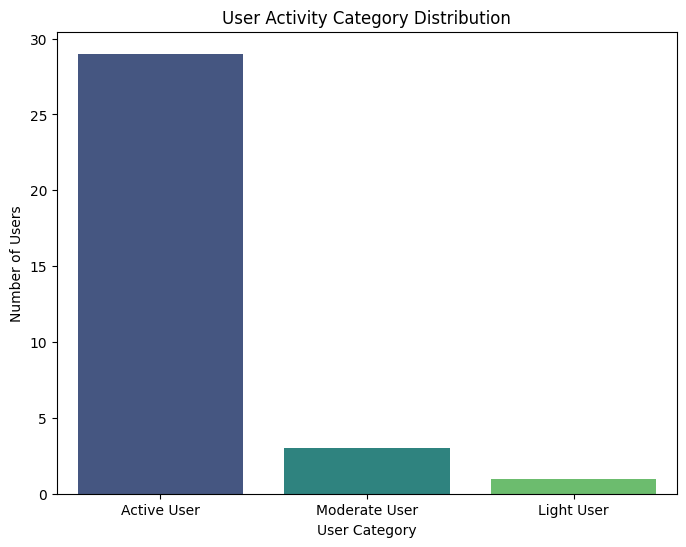

In [ ]:
# Generating a user segmentation column using 'Logging Frequency'
def categorize_user(days):
    if 25 <= days <= 31:
        return 'Active User'
    elif 15 <= days <= 24:
        return 'Moderate User'
    elif 0 <= days <= 14:
        return 'Light User'
    else:
        return 'Unknown' # Handling out-of-range cases.

log_freq['User_Category'] = log_freq['Logging Frequency'].apply(categorize_user)

# Displaying Segmentation Results
print("\nUser Classification by Fitbit Usage Frequency:")
print(log_freq.head())

# Number of Users in Each Category
user_category_counts = log_freq['User_Category'].value_counts().reset_index()
user_category_counts.columns = ['User_Category', 'Number_of_Users']

print("\nNumber of Users in Each Category:")
print(user_category_counts)

# Visualization (optional)
plt.figure(figsize=(8, 6))
sns.barplot(x='User_Category', y='Number_of_Users', data=user_category_counts, palette='viridis')
plt.title('User Activity Category Distribution')
plt.xlabel('User Category')
plt.ylabel('Number of Users')
plt.show()

##Activity Analysis

###User ID-Based Average Activity Minutes:

In [ ]:
# Calculating Average VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, and SedentaryMinutes per User ID.
average_activity_by_id = daily_activity.groupby('Id')[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']].mean().reset_index()

# Displaying Average Calculation Results
print("User ID-Based Average Activity Minutes:")
average_activity_by_id

User ID-Based Average Activity Minutes:


,Id,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
0,1503960366,38.709677,19.161290,219.935484,848.161290
1,1624580081,8.677419,5.806452,153.483871,1257.741935
2,1644430081,9.566667,21.366667,178.466667,1161.866667
3,1844505072,0.129032,1.290323,115.451613,1206.612903
4,1927972279,1.322581,0.774194,38.580645,1317.419355
5,2022484408,36.290323,19.354839,257.451613,1112.580645
6,2026352035,0.096774,0.258065,256.645161,689.419355
7,2320127002,1.354839,2.580645,198.193548,1220.096774
8,2347167796,13.500000,20.555556,252.500000,687.166667
9,2873212765,14.096774,6.129032,308.000000,1097.193548


###Daily Average Activity Duration

In [ ]:
# Calculating Average VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, and SedentaryMinutes per day of the week (ActivityDay)
average_minutes_by_day = daily_activity.groupby('ActivityDay')[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']].mean().reset_index()

# Displaying Average Calculation Results
print("Average Daily Activity Duration (in Minutes):")
average_minutes_by_day

Average Daily Activity Duration (in Minutes):


,ActivityDay,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
0,Friday,20.055556,12.111111,204.198413,1000.309524
1,Monday,23.108333,14.000000,192.058333,1027.941667
2,Saturday,21.919355,15.201613,207.145161,964.282258
3,Sunday,19.983471,14.528926,173.975207,990.256198
4,Thursday,19.408163,11.959184,185.421769,961.993197
5,Tuesday,22.953947,14.335526,197.342105,1007.361842
6,Wednesday,20.780000,13.100000,189.853333,989.480000


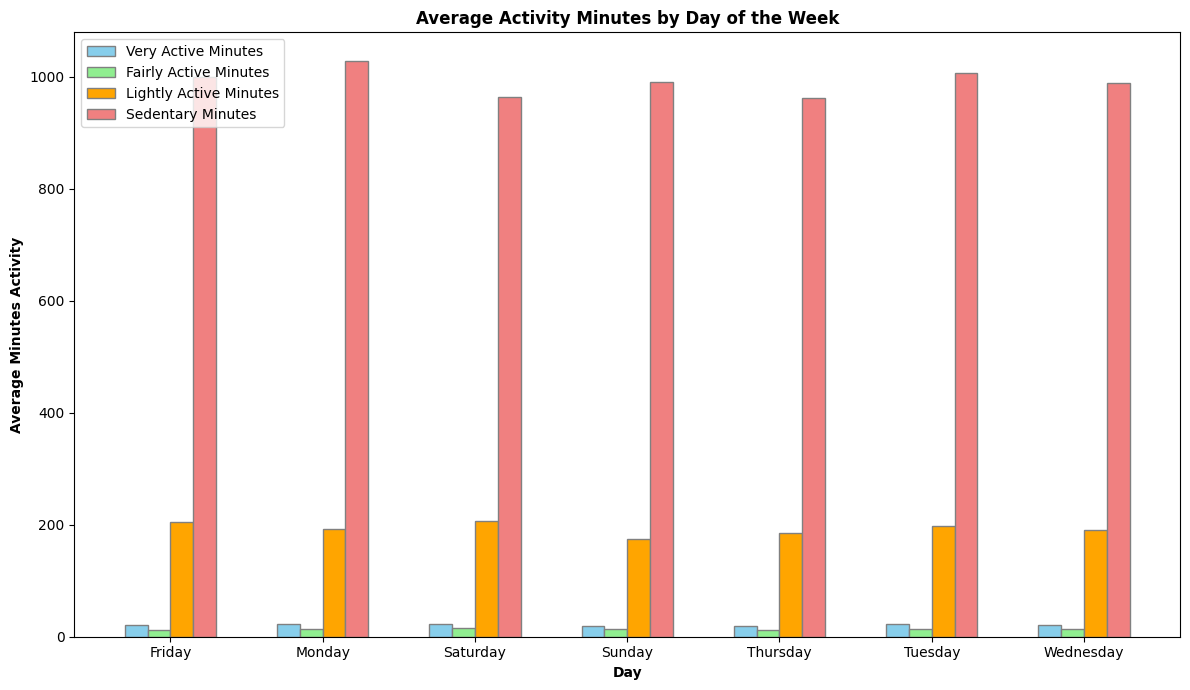

In [ ]:
# Displaying the results in a bar chart.
plt.figure(figsize=(12, 7))
bar_width = 0.15
days = average_minutes_by_day['ActivityDay']
r1 = range(len(days))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.bar(r1, average_minutes_by_day['VeryActiveMinutes'], color='skyblue', width=bar_width, edgecolor='grey', label='Very Active Minutes')
plt.bar(r2, average_minutes_by_day['FairlyActiveMinutes'], color='lightgreen', width=bar_width, edgecolor='grey', label='Fairly Active Minutes')
plt.bar(r3, average_minutes_by_day['LightlyActiveMinutes'], color='orange', width=bar_width, edgecolor='grey', label='Lightly Active Minutes')
plt.bar(r4, average_minutes_by_day['SedentaryMinutes'], color='lightcoral', width=bar_width, edgecolor='grey', label='Sedentary Minutes')

plt.xlabel('Day', fontweight='bold')
plt.ylabel('Average Minutes Activity', fontweight='bold')
plt.title('Average Activity Minutes by Day of the Week', fontweight='bold')
plt.xticks([r + bar_width*1.5 for r in range(len(days))], days)
plt.legend()
#plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

Based on WHO guidelines, the recommended physical activity threshold for adults aged 18-64 is 150 minutes of moderate-intensity or 75 minutes of vigorous-intensity activity weekly (or an equivalent). To optimize health benefits, this threshold doubles to 300 minutes of moderate-intensity activity per week, or its equivalent. Source: [link text](https://https://www.who.int/initiatives/behealthy/physical-activity)

Number of users who have an average of “FairlyActiveMinutes” above 150 minutes per week and “VeryActiveMinutes” above 75 minutes per week

In [ ]:
# Average 'FairlyActiveMinutes' and 'VeryActiveMinutes' per User
average_fairly_active_by_id = daily_activity.groupby('Id')['FairlyActiveMinutes'].mean().reset_index()
average_very_active_by_id = daily_activity.groupby('Id')['VeryActiveMinutes'].mean().reset_index()

# Filtering User IDs with average 'LightlyActiveMinutes' exceeding 150 and 'VeryActiveMinutes' exceeding 75.
ids_above_150_fairly_active = average_fairly_active_by_id[average_fairly_active_by_id['FairlyActiveMinutes'] > 150]
ids_above_75_very_active = average_very_active_by_id[average_very_active_by_id['VeryActiveMinutes'] > 75]

# Total Users Fulfilling Criteria
count_ids_above_150_fairly = ids_above_150_fairly_active['Id'].nunique()
count_ids_above_75_very = ids_above_75_very_active['Id'].nunique()

print(f"\nNumber of Users with an Average of Over 150 Minutes of Moderate Physical Activity Per Week: {count_ids_above_150_fairly}")
print(f"\nNumber of Users with an Average of Over 75 Minutes of Vigorous Physical Activity Per Week: {count_ids_above_75_very}")


Number of Users with an Average of Over 150 Minutes of Moderate Physical Activity Per Week: 0

Number of Users with an Average of Over 75 Minutes of Vigorous Physical Activity Per Week: 2


For analytical simplicity, 'FairlyActiveMinutes' and 'VeryActiveMinutes' will be combined into a new metric, 'TotalActiveMinutes'. This new metric will serve as a simplified representation of overall active minutes relevant to WHO recommendations.


User Count by WHO Recommendation (At least 150 Active Minutes Per Week):
                   Category  Number_of_Users
0  Above WHO Recommendation               19
1  Below WHO Recommendation               14


/tmp/ipython-input-74029174.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Number_of_Users', data=who_recommendation_counts, palette='viridis')


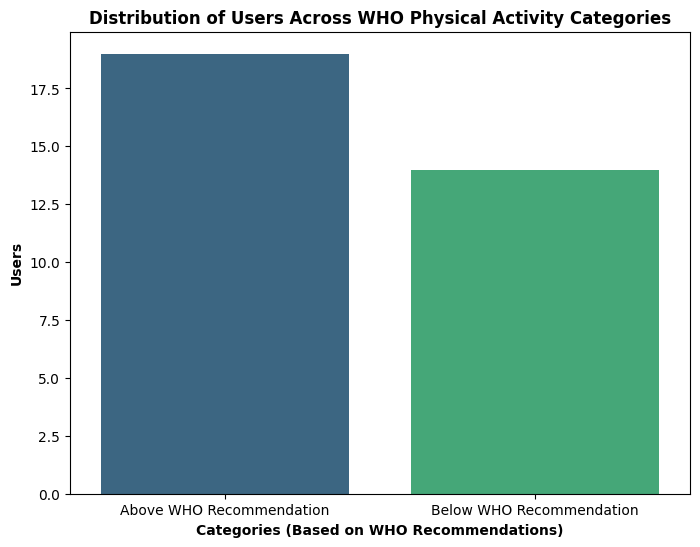

In [ ]:
daily_activity['TotalActiveMinutes'] = daily_activity['VeryActiveMinutes'] + daily_activity['FairlyActiveMinutes']

# Calculating the average 'TotalActiveMinutes' per user
average_total_active_by_id = daily_activity.groupby('Id')['TotalActiveMinutes'].mean().reset_index()

# WHO-Recommended Activity Category (Average ≥ 150 minutes per week)
# Since our data is recorded daily, we'll check if the average daily activity, when multiplied by 7, is close to 150 minutes per week.
# 150 minutes / 7 days = ~21.4 minutes per day.
# We will categorize all users based on whether their average daily activity meets or exceeds this calculated daily threshold."
average_total_active_by_id['WHO_Recommendation'] = average_total_active_by_id['TotalActiveMinutes'].apply(lambda x: 'Above WHO Recommendation' if x * 7 >= 150 else 'Below WHO Recommendation')

# Number of Users in Each WHO Recommendation Category
who_recommendation_counts = average_total_active_by_id['WHO_Recommendation'].value_counts().reset_index()
who_recommendation_counts.columns = ['Category', 'Number_of_Users']

print("\nUser Count by WHO Recommendation (At least 150 Active Minutes Per Week):")
print(who_recommendation_counts)

# Bar chart visualization for WHO reccomendations
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Number_of_Users', data=who_recommendation_counts, palette='viridis')
plt.title('Distribution of Users Across WHO Physical Activity Categories', fontweight='bold')
plt.xlabel('Categories (Based on WHO Recommendations)', fontweight='bold')
plt.ylabel('Users', fontweight='bold')
plt.show()

###Hourly Activity Pattern


Hourly Total Intensity:
    Hour  Total_Intensity
0      0             1989
1      1             1324
2      2              974
3      3              414
4      4              590
5      5             4614
6      6             7235
7      7             9993
8      8            13656
9      9            14326
10    10            16391
11    11            15686
12    12            18299
13    13            17292
14    14            17378
15    15            14260
16    16            16069
17    17            19620
18    18            19861
19    19            19375
20    20            12992
21    21            10926
22    22             8193
23    23             4512


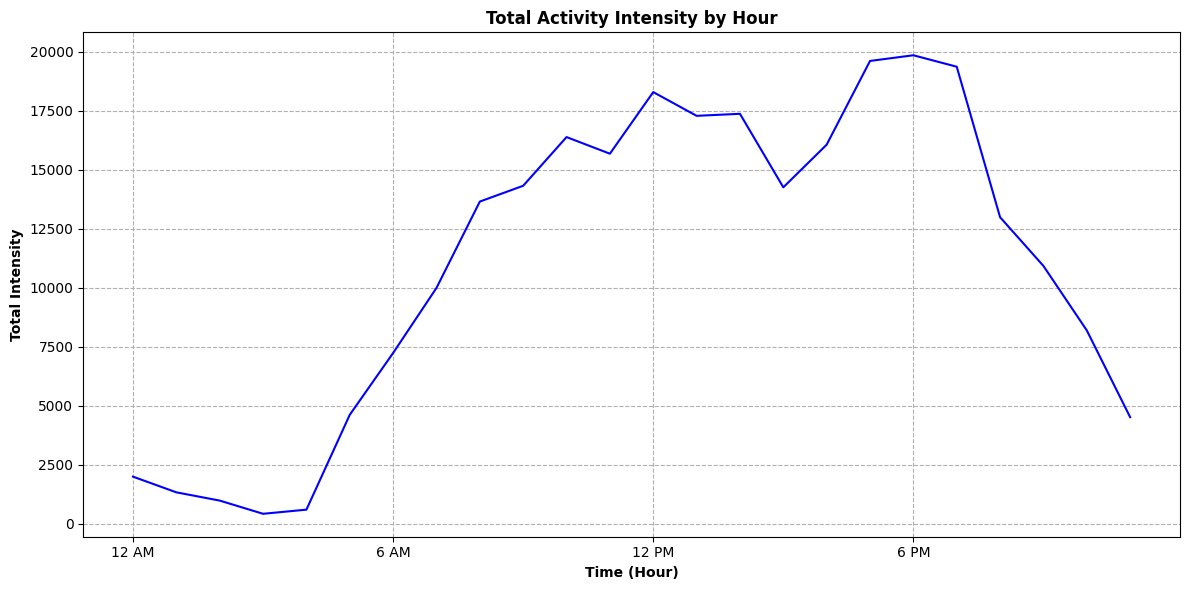

In [ ]:
# Ensure the 'ActivityHour' column is cast to a datetime data type
hourly_intensities['ActivityHour'] = pd.to_datetime(hourly_intensities['ActivityHour'])

# Extracting Hour data from 'ActivityHour' Column
hourly_intensities['Hour'] = hourly_intensities['ActivityHour'].dt.hour

# Aggregating Hourly Total Intensity Data
total_intensity_by_hour = hourly_intensities.groupby('Hour')['TotalIntensity'].sum().reset_index(name='Total_Intensity')

# Sorting by Hour
total_intensity_by_hour_sorted = total_intensity_by_hour.sort_values(by='Hour', ascending=True)

# Showing Result
print("\nHourly Total Intensity:")
print(total_intensity_by_hour_sorted)

# Visualization: Total Intensity by Hour in Line Chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Total_Intensity', data=total_intensity_by_hour_sorted, color='blue')

plt.title('Total Activity Intensity by Hour', fontweight='bold')
plt.xlabel('Time (Hour)', fontweight='bold')
plt.ylabel('Total Intensity', fontweight='bold')

# Configuring X-Axis for Comprehensive Hourly Display with AM/PM format and 6-hour intervals
plt.xticks(range(0, 24, 6), [f'{h%12 or 12}{" AM" if h < 12 else " PM"}' for h in range(0, 24, 6)])

plt.grid(axis='both', linestyle='--')
plt.tight_layout()
plt.show()


Hourly Average Total Intensity:
    Hour  Average_Total_Intensity
0      0                 2.129550
1      1                 1.419078
2      2                 1.043944
3      3                 0.443730
4      4                 0.633047
5      5                 4.950644
6      6                 7.771214
7      7                10.733620
8      8                14.668099
9      9                15.387755
10    10                17.643703
11    11                16.921251
12    12                19.847072
13    13                18.775244
14    14                18.868621
15    15                15.584699
16    16                17.716648
17    17                21.655629
18    18                21.921634
19    19                21.385210
20    20                14.339956
21    21                12.072928
22    22                 9.063053
23    23                 4.996678


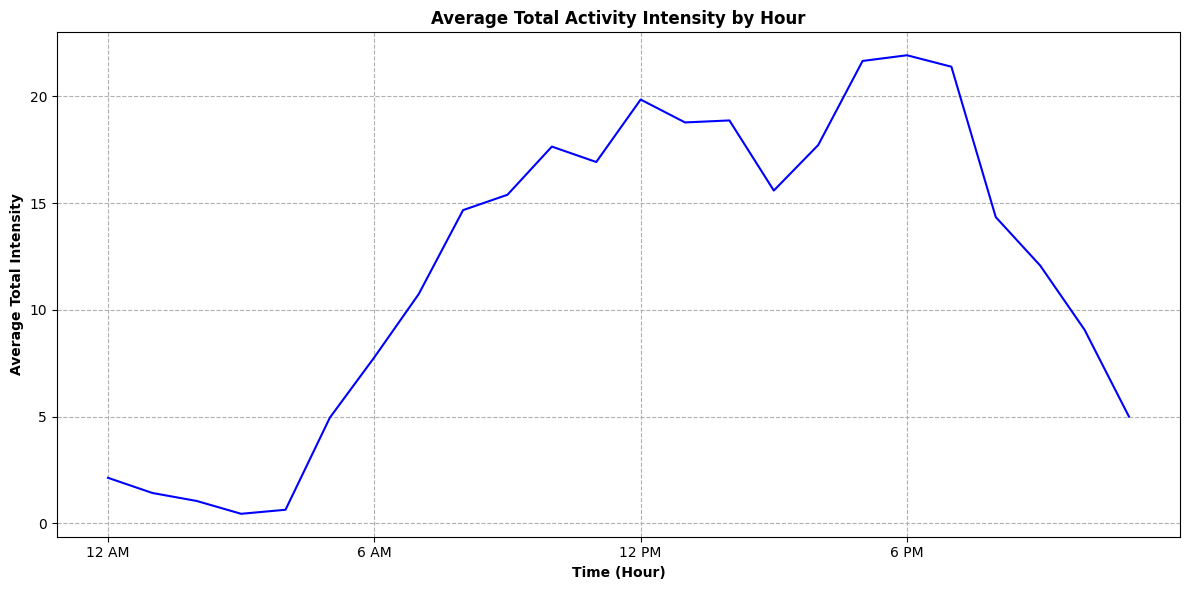

In [ ]:
# Ensure the 'ActivityHour' column is cast to a datetime data type
hourly_intensities['ActivityHour'] = pd.to_datetime(hourly_intensities['ActivityHour'])

# Extracting Hour data from 'ActivityHour' Column
hourly_intensities['Hour'] = hourly_intensities['ActivityHour'].dt.hour

# Aggregating Hourly Average Intensity Data
average_intensity_by_hour = hourly_intensities.groupby('Hour')['TotalIntensity'].mean().reset_index(name='Average_Total_Intensity')

# Sorting by Hour
average_intensity_by_hour_sorted = average_intensity_by_hour.sort_values(by='Hour', ascending=True)

# Showing Result
print("\nHourly Average Total Intensity:")
print(average_intensity_by_hour_sorted)

# Visualization: Average Intensity by Hour in Line Chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Average_Total_Intensity', data=average_intensity_by_hour_sorted, color='blue')

plt.title('Average Total Activity Intensity by Hour', fontweight='bold')
plt.xlabel('Time (Hour)', fontweight='bold')
plt.ylabel('Average Total Intensity', fontweight='bold')

# Configuring X-Axis for Comprehensive Hourly Display with AM/PM format and 6-hour intervals
plt.xticks(range(0, 24, 6), [f'{h%12 or 12}{" AM" if h < 12 else " PM"}' for h in range(0, 24, 6)])

plt.grid(axis='both', linestyle='--')
plt.tight_layout()
plt.show()

###Activity Duration by Day of the Week

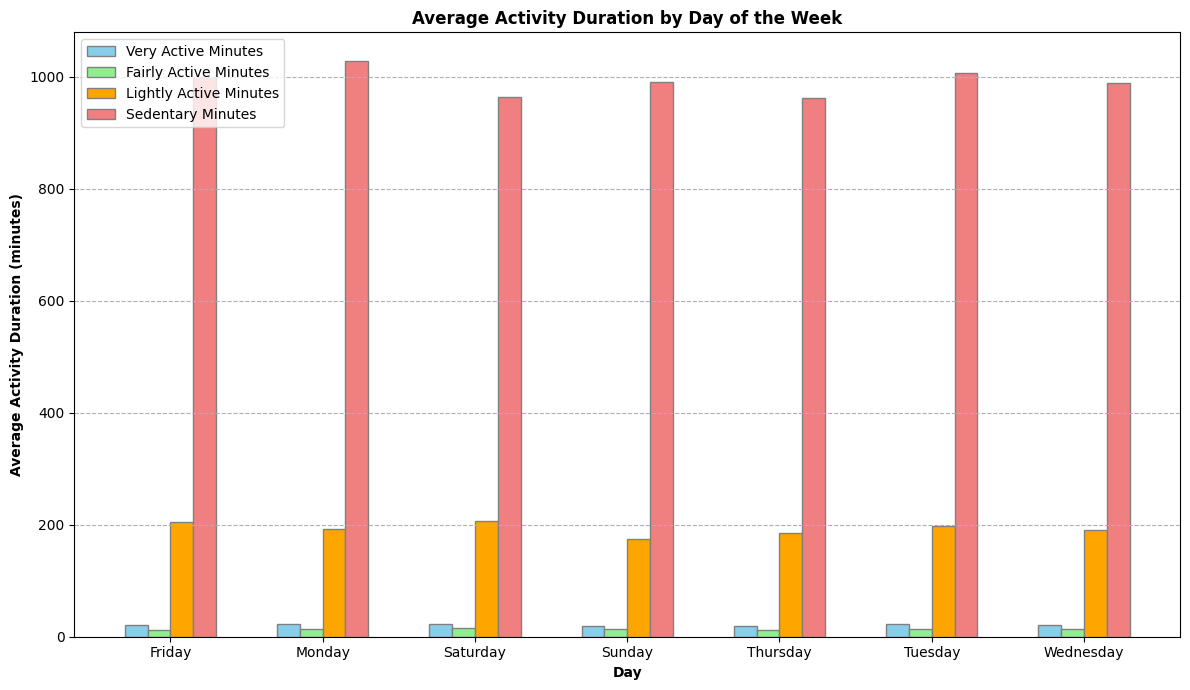

In [ ]:
# Displaying the results in a bar chart.
plt.figure(figsize=(12, 7))
bar_width = 0.15
days = average_minutes_by_day['ActivityDay']
r1 = range(len(days))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.bar(r1, average_minutes_by_day['VeryActiveMinutes'], color='skyblue', width=bar_width, edgecolor='grey', label='Very Active Minutes')
plt.bar(r2, average_minutes_by_day['FairlyActiveMinutes'], color='lightgreen', width=bar_width, edgecolor='grey', label='Fairly Active Minutes')
plt.bar(r3, average_minutes_by_day['LightlyActiveMinutes'], color='orange', width=bar_width, edgecolor='grey', label='Lightly Active Minutes')
plt.bar(r4, average_minutes_by_day['SedentaryMinutes'], color='lightcoral', width=bar_width, edgecolor='grey', label='Sedentary Minutes')

plt.xlabel('Day', fontweight='bold')
plt.ylabel('Average Activity Duration (minutes)', fontweight='bold')
plt.title('Average Activity Duration by Day of the Week', fontweight='bold')
plt.xticks([r + bar_width*1.5 for r in range(len(days))], days)
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

###User Activity Analysis

In [ ]:
# Calculating Total Steps and Calories per User.
daily_activity_grouped_by_id = daily_activity.groupby('Id').agg({
    'TotalSteps': 'sum',
    'Calories': 'sum'
}).reset_index()

# Calculating total activity duration per user.
daily_activity_grouped_by_id['Total_Active_Minutes'] = daily_activity.groupby('Id')[['VeryActiveMinutes', 'FairlyActiveMinutes']].sum().sum(axis=1).values

# Showing the results
print("\nUser Activity Data:")
print(daily_activity_grouped_by_id.head())
print("\nUser Activity Data (Information):")
print(daily_activity_grouped_by_id.info())

# Renaming the daily_activity_grouped_by_id dataset to how_active_users, and the 'Calories' column to 'TotalCalories'.
how_active_users = daily_activity_grouped_by_id.rename(columns={'Calories': 'TotalCalories'})

# Displaying results after renaming.
print("\nHow Active Users:")
print(how_active_users.head())

print("\nHow Active Users (Information)")
print(how_active_users.info())


User Activity Data:
           Id  TotalSteps  Calories  Total_Active_Minutes
0  1503960366      375619     56309                  1794
1  1624580081      178061     45984                   449
2  1644430081      218489     84339                   928
3  1844505072       79982     48778                    44
4  1927972279       28400     67357                    65

User Activity Data (Information):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Id                    33 non-null     int64
 1   TotalSteps            33 non-null     int64
 2   Calories              33 non-null     int64
 3   Total_Active_Minutes  33 non-null     int64
dtypes: int64(4)
memory usage: 1.2 KB
None

How Active Users:
           Id  TotalSteps  TotalCalories  Total_Active_Minutes
0  1503960366      375619          56309                  1794
1  162458008

###Distribution of Activity Duration by User Category

/tmp/ipython-input-4132209875.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='User_Category', y='Activity Duration', data=log_freq, palette='viridis', ci=None)
/tmp/ipython-input-4132209875.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='User_Category', y='Activity Duration', data=log_freq, palette='viridis', ci=None)


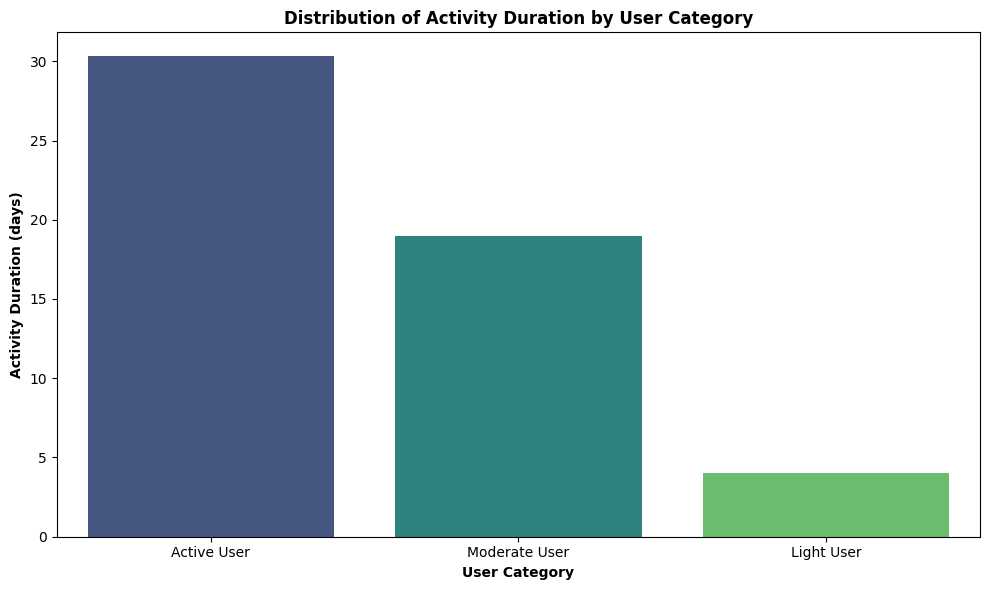

In [ ]:
# Rename the 'Logging Frequency' column to 'Activity Duration' for clarity
log_freq = log_freq.rename(columns={'Logging Frequency': 'Activity Duration'})

# Create a bar plot to visualize the distribution of activity duration by user category
plt.figure(figsize=(10, 6))
sns.barplot(x='User_Category', y='Activity Duration', data=log_freq, palette='viridis', ci=None)
plt.title('Distribution of Activity Duration by User Category', fontweight='bold')
plt.xlabel('User Category', fontweight='bold')
plt.ylabel('Activity Duration (days)', fontweight='bold')
# plt.grid(axis='y', linestyle='--') # Menghilangkan grid line
plt.tight_layout()
plt.show()

Why is there no “Passive User” category?



Based on the analysis conducted in the notebook, the “Passive User” category is defined based on the average daily steps taken by each user (0-4999 steps).



The bar chart you asked about earlier (“Distribution of Activity Duration by User Category”) categorizes users based on the frequency of their data recording, namely the number of days they recorded data. The categories used there are “Active User,” “Moderate User,” and “Light User” based on how often they recorded data.



So, even though there are users categorized as “Passive Users” based on their number of steps, the “Activity Duration” chart uses a different categorization based on how many days they recorded data. The output from the step_category_counts cell shows that there are indeed 8 users in the ‘Passive User’ category based on their average daily steps.



Why wasn't the “Passive User” category included in the chart?



In the “Distribution of Activity Duration by User Category” chart, user categorization is based on the frequency of their data recording (how many days the data was recorded), not on their daily step count.



The categories used in the chart are:

* Active User: Users who recorded data for 25–31 days

* Moderate User: Users who recorded data for 15–24 days

* Light User: Users who recorded data for 0–14 days



Therefore, the “Passive User” category you saw in the previous analysis is based on average daily steps, not on the frequency of data recording. As a result, the “Passive User” category does not appear in the “Distribution of Activity Duration by User Category” graph.

###Average Total Activity Duration by Days of the Week

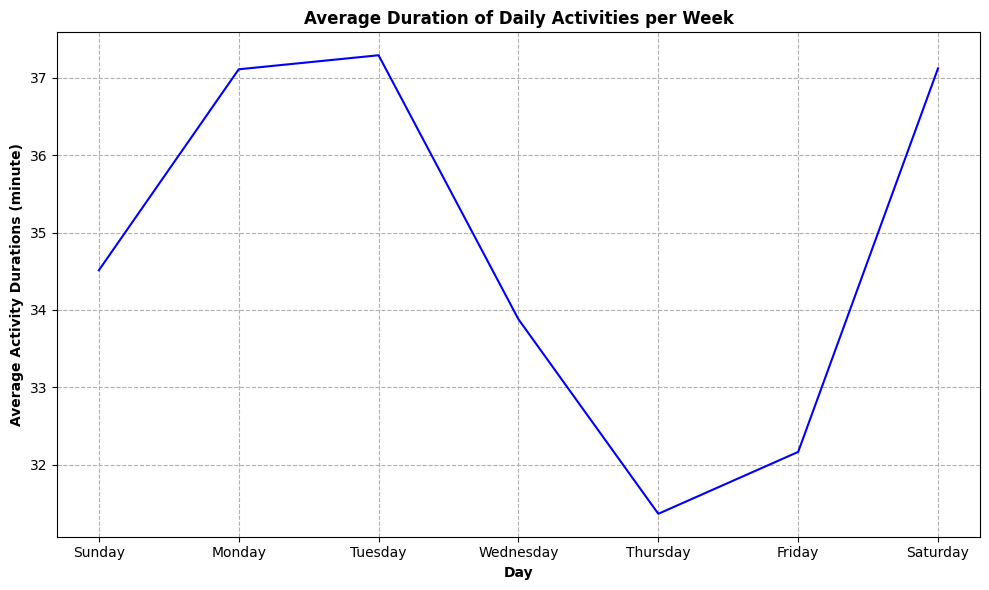

,ActivityDay,Average_TotalActiveMinutes
3,Sunday,34.512397
1,Monday,37.108333
5,Tuesday,37.289474
6,Wednesday,33.880000
4,Thursday,31.367347
0,Friday,32.166667
2,Saturday,37.120968


In [ ]:
# Calculating the average Total Active Minutes per day of the week
average_TotalActiveMinutes_by_day = daily_activity.groupby('ActivityDay')['TotalActiveMinutes'].mean().reset_index(name='Average_TotalActiveMinutes')

# Ordering the days of the week
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
average_TotalActiveMinutes_by_day['ActivityDay'] = pd.Categorical(average_TotalActiveMinutes_by_day['ActivityDay'], categories=day_order, ordered=True)
average_TotalActiveMinutes_by_day = average_TotalActiveMinutes_by_day.sort_values('ActivityDay')

# Creating the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='ActivityDay', y='Average_TotalActiveMinutes', data=average_TotalActiveMinutes_by_day, color='blue')

plt.title('Average Duration of Daily Activities per Week', fontweight='bold')
plt.xlabel('Day', fontweight='bold')
plt.ylabel('Average Activity Durations (minute)', fontweight='bold')

plt.grid(axis='both', linestyle='--')
plt.tight_layout()
plt.show()

display(average_TotalActiveMinutes_by_day)

##Steps Analysis

###User Types by Total Steps


User Grouping by Average Daily Steps:
           Id    TotalSteps Step_Category
0  1503960366  12116.741935   Active User
1  1624580081   5743.903226    Light User
2  1644430081   7282.966667    Light User
3  1844505072   2580.064516  Passive User
4  1927972279    916.129032  Passive User

User Count per Daily Step Category:
   Step_Category  Number_of_Users
0     Light User                9
1  Moderate User                9
2   Passive User                8
3    Active User                7


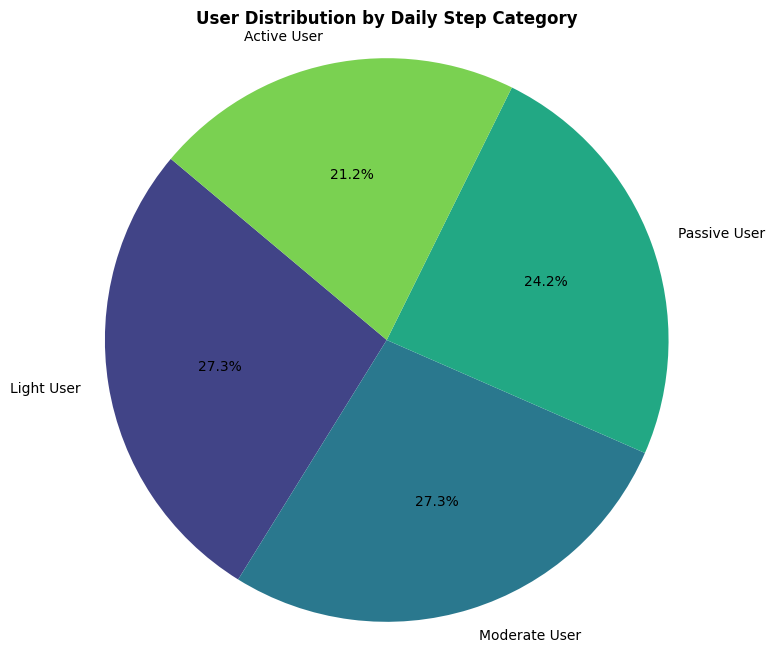

In [ ]:
# Average Total Steps per user
average_steps_by_id = daily_activity.groupby('Id')['TotalSteps'].mean().reset_index()

# Categorizing users by average daily steps
def categorize_steps(steps):
    if 0 <= steps <= 4999:
        return 'Passive User'
    elif 5000 <= steps <= 7499:
        return 'Light User'
    elif 7500 <= steps <= 9999:
        return 'Moderate User'
    elif steps >= 10000:
        return 'Active User'
    else:
        return 'Unknown'

average_steps_by_id['Step_Category'] = average_steps_by_id['TotalSteps'].apply(categorize_steps)

# Displaying Segmentation Results
print("\nUser Grouping by Average Daily Steps:")
print(average_steps_by_id.head())

# User Count by Step Category
step_category_counts = average_steps_by_id['Step_Category'].value_counts().reset_index()
step_category_counts.columns = ['Step_Category', 'Number_of_Users']

print("\nUser Count per Daily Step Category:")
print(step_category_counts)

# Pie Chart Visualization for Daily Step Categories
plt.figure(figsize=(8, 8))
plt.pie(step_category_counts['Number_of_Users'], labels=step_category_counts['Step_Category'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(step_category_counts)))
plt.title('User Distribution by Daily Step Category', fontweight='bold')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

###Average Daily Steps

In [ ]:
# Calculate the average “TotalSteps” to be called “Avg_Total_Steps”
# then group it by “ActivityDay”, sort it based on the average “TotalSteps” from the largest to the smallest (Descending).
avg_steps_per_day = daily_activity.groupby('ActivityDay')['TotalSteps'].mean().reset_index(name='Avg_Total_Steps')

# Sorting by "Avg_Total_Steps" in descending order
avg_steps_per_day_sorted = avg_steps_per_day.sort_values(by='Avg_Total_Steps', ascending=False)

# Showing Results
print("\nAverage Daily Steps for All Users:")
avg_steps_per_day_sorted


Average Daily Steps for All Users:


,ActivityDay,Avg_Total_Steps
2,Saturday,8152.975806
5,Tuesday,8125.006579
1,Monday,7780.866667
6,Wednesday,7559.373333
0,Friday,7448.230159
4,Thursday,7405.836735
3,Sunday,6933.231405


/tmp/ipython-input-2370082045.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='ActivityDay', y='Avg_Total_Steps', data=avg_steps_per_day_sorted, palette='viridis')


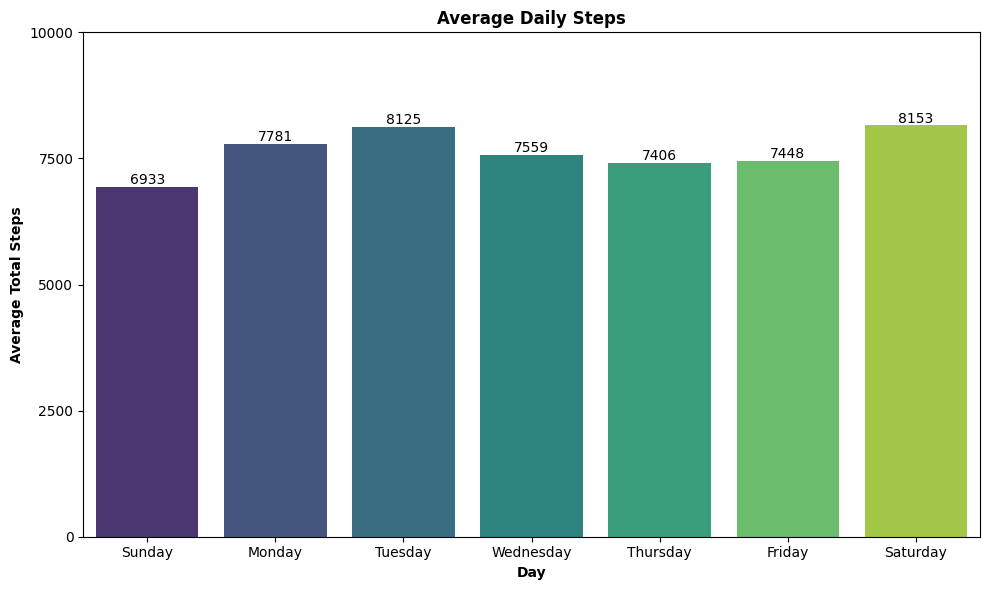

In [ ]:
# Bar Chart Visualization

# Manually sorting the days of the week to ensure the correct order on the plot
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
avg_steps_per_day_sorted['ActivityDay'] = pd.Categorical(avg_steps_per_day_sorted['ActivityDay'], categories=day_order, ordered=True)
avg_steps_per_day_sorted = avg_steps_per_day_sorted.sort_values('ActivityDay')

# Creating bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='ActivityDay', y='Avg_Total_Steps', data=avg_steps_per_day_sorted, palette='viridis')

# Setting the Y-Axis Scale (limit: 0-10000; interval: 2500)
plt.ylim(0, 10000)
plt.yticks(range(0, 10001, 2500))

# Inserting title and axis labels
plt.title('Average Daily Steps', fontweight='bold')
plt.xlabel('Day', fontweight='bold')
plt.ylabel('Average Total Steps', fontweight='bold')

# Remove grid lines
# plt.grid(axis='y', linestyle='--')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

###Total Steps by Hour


Horurly Total Steps (Descending):
    Hour  total_steps_by_hour
18    18               542848
19    19               528552
12    12               505848
17    17               498511
14    14               497813
13    13               495220
16    16               450639
10    10               447467
11    11               423534
9      9               403404
8      8               398044
15    15               371782
20    20               320638
7      7               284932
21    21               278865
22    22               215141
6      6               166191
23    23               110286
5      5                40886
0      0                39404
1      1                21555
2      2                15964
4      4                11836
3      3                 5996


/tmp/ipython-input-1534930512.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hour', y='total_steps_by_hour', data=total_steps_by_hour_sorted, palette='viridis')


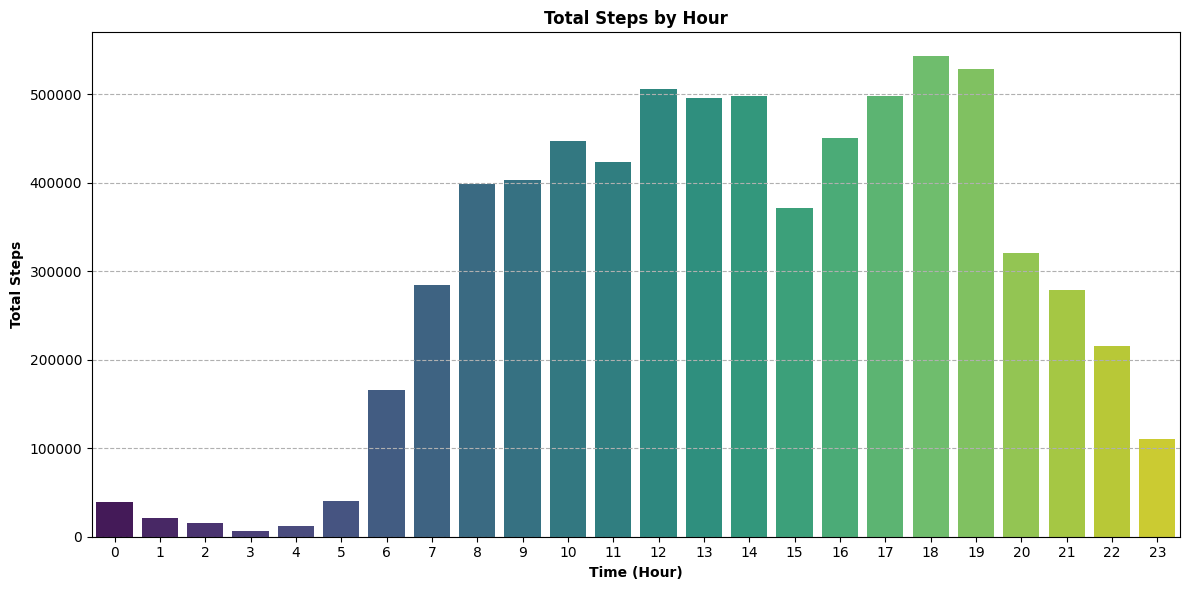

In [ ]:
# Ensure the 'ActivityHour' column is cast to a datetime data type"
hourly_steps['ActivityHour'] = pd.to_datetime(hourly_steps['ActivityHour'])

# Extracting Hour data from 'ActivityHour' Column
hourly_steps['Hour'] = hourly_steps['ActivityHour'].dt.hour

# Aggregating Hourly Step Data
total_steps_by_hour = hourly_steps.groupby('Hour')['StepTotal'].sum().reset_index(name='total_steps_by_hour')

# Sorting by Total Steps (Descending)
total_steps_by_hour_sorted = total_steps_by_hour.sort_values(by='total_steps_by_hour', ascending=False)

# Showing Result
print("\nHorurly Total Steps (Descending):")
print(total_steps_by_hour_sorted)

# Visualization: Total Steps by Hour in Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='total_steps_by_hour', data=total_steps_by_hour_sorted, palette='viridis')
plt.title('Total Steps by Hour', fontweight='bold')
plt.xlabel('Time (Hour)', fontweight='bold')
plt.ylabel('Total Steps', fontweight='bold')
plt.xticks(total_steps_by_hour_sorted['Hour']) # Configuring X-Axis for Comprehensive Hourly Display
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

###Correlation between Average Steps and Activity Time (in 24 hours)


Houly Average Steps:
    Hour  Average_Steps
0      0      42.188437
1      1      23.102894
2      2      17.110397
3      3       6.426581
4      4      12.699571
5      5      43.869099
6      6     178.508056
7      7     306.049409
8      8     427.544576
9      9     433.301826
10    10     481.665231
11    11     456.886731
12    12     548.642082
13    13     537.698154
14    14     540.513572
15    15     406.319126
16    16     496.845645
17    17     550.232892
18    18     599.169978
19    19     583.390728
20    20     353.905077
21    21     308.138122
22    22     237.987832
23    23     122.132890


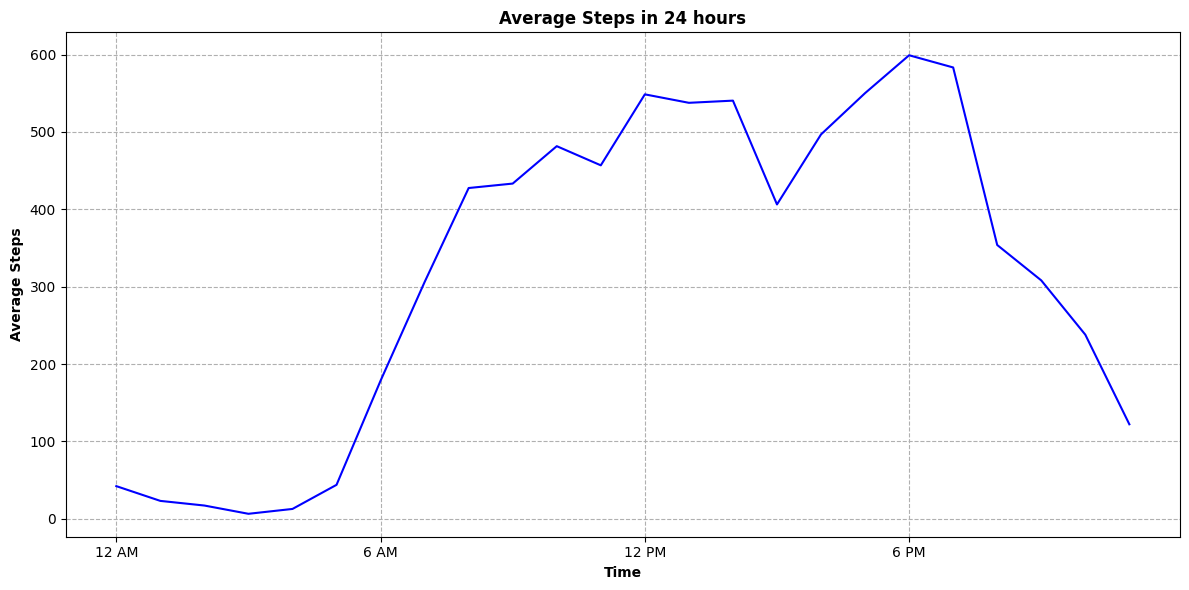

In [ ]:
# Ensure the 'ActivityHour' column is cast to a datetime data type
hourly_steps['ActivityHour'] = pd.to_datetime(hourly_steps['ActivityHour'])

# Extracting Hour data from 'ActivityHour' Column
hourly_steps['Hour'] = hourly_steps['ActivityHour'].dt.hour

# Aggregating Hourly Step Data
average_steps_by_hour = hourly_steps.groupby('Hour')['StepTotal'].mean().reset_index(name='Average_Steps')

# Sorting by Hour
average_steps_by_hour_sorted = average_steps_by_hour.sort_values(by='Hour', ascending=True)

# Showing Result
print("\nHouly Average Steps:")
print(average_steps_by_hour_sorted)

# Visualization: Average Steps by Hour with Smooth Line
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Average_Steps', data=average_steps_by_hour_sorted, color='blue')

plt.title('Average Steps in 24 hours', fontweight='bold')
plt.xlabel('Time', fontweight='bold')
plt.ylabel('Average Steps', fontweight='bold')

# Configuring X-Axis for Comprehensive Hourly Display with AM/PM format and 6-hour intervals
plt.xticks(range(0, 24, 6), [f'{h%12 or 12}{" AM" if h < 12 else " PM"}' for h in range(0, 24, 6)])

plt.grid(axis='both', linestyle='--') # Modified grid line to include both vertical and horizontal
plt.tight_layout()
plt.show()

## Sleep Analysis

###Average Daily Sleep per Day of The Week

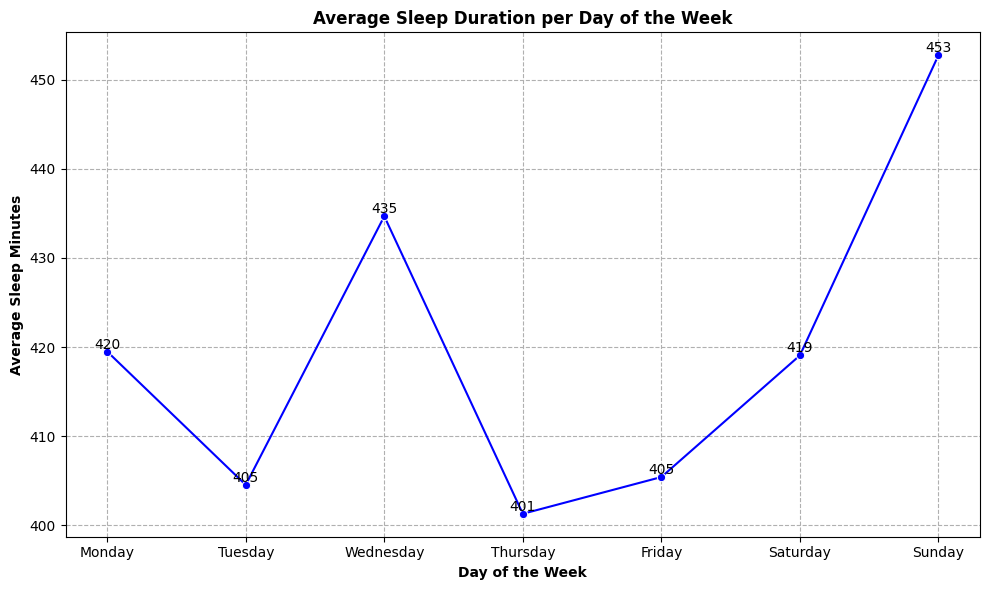

,SleepDay,Average_Minutes_Asleep
1,Monday,419.500000
5,Tuesday,404.538462
6,Wednesday,434.681818
4,Thursday,401.296875
0,Friday,405.421053
2,Saturday,419.070175
3,Sunday,452.745455


In [ ]:
# Calculate the average sleep minutes per day of the week
average_sleep_by_day = daily_sleep.groupby(daily_sleep['SleepDay'].dt.day_name())['TotalMinutesAsleep'].mean().reset_index(name='Average_Minutes_Asleep')

# Order the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_sleep_by_day['SleepDay'] = pd.Categorical(average_sleep_by_day['SleepDay'], categories=day_order, ordered=True)
average_sleep_by_day = average_sleep_by_day.sort_values('SleepDay')

# Create the line plot
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='SleepDay', y='Average_Minutes_Asleep', data=average_sleep_by_day, color='blue', marker='o') # Added marker='o' to show points

plt.title('Average Sleep Duration per Day of the Week', fontweight='bold')
plt.xlabel('Day of the Week', fontweight='bold')
plt.ylabel('Average Sleep Minutes', fontweight='bold')

plt.grid(axis='both', linestyle='--') # Modified grid line to include both vertical and horizontal
plt.tight_layout()

# Add data labels to each point
for x, y in zip(average_sleep_by_day['SleepDay'], average_sleep_by_day['Average_Minutes_Asleep']):
    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom')

plt.show()

display(average_sleep_by_day)

###Identifying the Date with Peak Collective Sleep Duration

In [ ]:
# Converting 'SleepDay' to Datetime Data Type
daily_sleep['SleepDay'] = pd.to_datetime(daily_sleep['SleepDay'], format='%m/%d/%Y %I:%M:%S %p')

# Aggregating Total Sleep Duration by Day
total_sleep_by_day = daily_sleep.groupby('SleepDay')['TotalMinutesAsleep'].sum().reset_index(name='TotalMinutesAsleepForAllUsers')

# Identifying the Date with Highest Collective Sleep Duration
most_sleep_day = total_sleep_by_day.loc[total_sleep_by_day['TotalMinutesAsleepForAllUsers'].idxmax()]

# Showing Result
print("\nThe date with the highest number of minutes slept for all users:")
most_sleep_day


The date with the highest number of minutes slept for all users:


,3
SleepDay,2016-04-15 00:00:00
TotalMinutesAsleepForAllUsers,7267


###Average Sleep Efficiency per Day of The Week

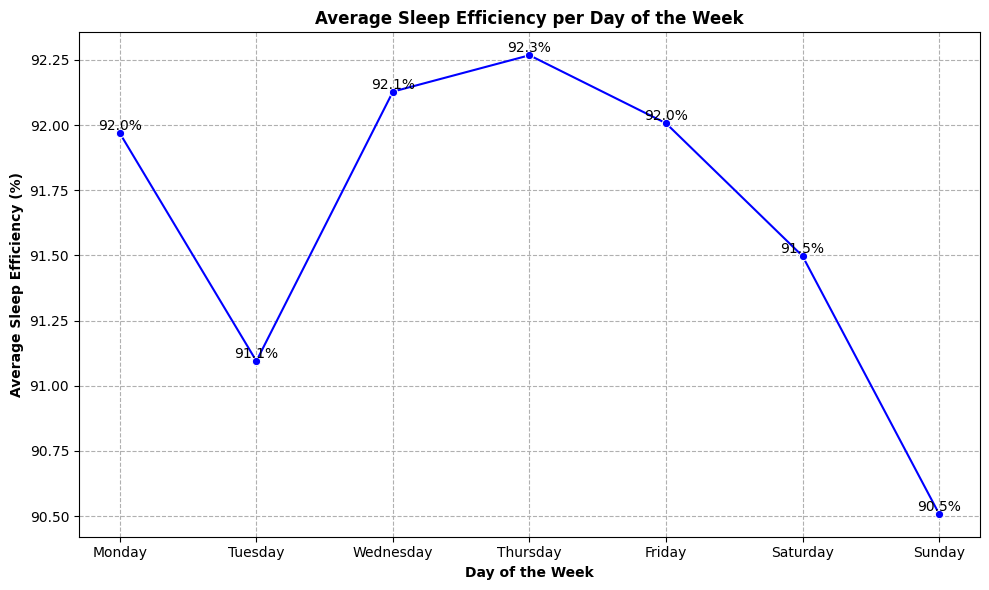

,SleepDay,Average_Sleep_Efficiency
1,Monday,91.968621
5,Tuesday,91.094809
6,Wednesday,92.128525
4,Thursday,92.268032
0,Friday,92.007138
2,Saturday,91.497871
3,Sunday,90.508978


In [ ]:
# Calculate Sleep Efficiency
daily_sleep['Sleep_Efficiency'] = (daily_sleep['TotalMinutesAsleep'] / daily_sleep['TotalTimeInBed']) * 100

# Calculate the average sleep efficiency per day of the week
average_sleep_efficiency_by_day = daily_sleep.groupby(daily_sleep['SleepDay'].dt.day_name())['Sleep_Efficiency'].mean().reset_index(name='Average_Sleep_Efficiency')

# Order the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_sleep_efficiency_by_day['SleepDay'] = pd.Categorical(average_sleep_efficiency_by_day['SleepDay'], categories=day_order, ordered=True)
average_sleep_efficiency_by_day = average_sleep_efficiency_by_day.sort_values('SleepDay')

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='SleepDay', y='Average_Sleep_Efficiency', data=average_sleep_efficiency_by_day, color='blue', marker='o')

plt.title('Average Sleep Efficiency per Day of the Week', fontweight='bold')
plt.xlabel('Day of the Week', fontweight='bold')
plt.ylabel('Average Sleep Efficiency (%)', fontweight='bold')

plt.grid(axis='both', linestyle='--')
plt.tight_layout()

# Add data labels to each point
for x, y in zip(average_sleep_efficiency_by_day['SleepDay'], average_sleep_efficiency_by_day['Average_Sleep_Efficiency']):
    plt.text(x, y, f'{y:.1f}%', ha='center', va='bottom')


plt.show()

display(average_sleep_efficiency_by_day)

###Average Sleep Efficiency per Week

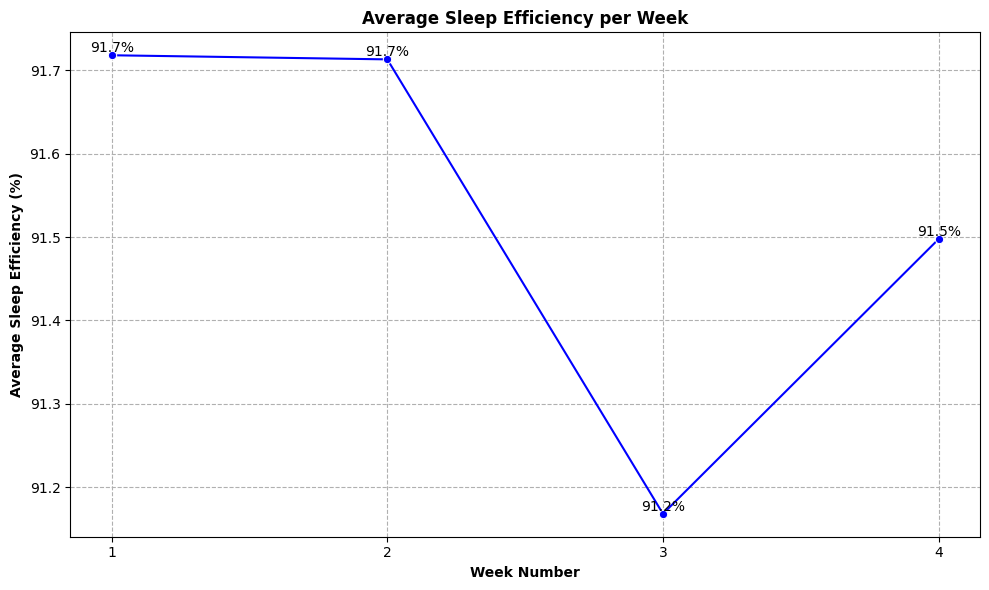

,Relative_Week,Average_Sleep_Efficiency
0,1,91.718142
1,2,91.713209
2,3,91.168069
3,4,91.497667


In [ ]:
# Ensure 'SleepDay' is in datetime format
daily_sleep['SleepDay'] = pd.to_datetime(daily_sleep['SleepDay'], format='%m/%d/%Y %I:%M:%S %p')

# Calculate Sleep Efficiency
daily_sleep['Sleep_Efficiency'] = (daily_sleep['TotalMinutesAsleep'] / daily_sleep['TotalTimeInBed']) * 100

# Calculate the week number relative to the start date of the data
start_date = daily_sleep['SleepDay'].min()
daily_sleep['Relative_Week'] = daily_sleep['SleepDay'].apply(lambda date: (date - start_date).days // 7 + 1)

# Calculate the average sleep efficiency per relative week
average_sleep_efficiency_by_relative_week = daily_sleep.groupby('Relative_Week')['Sleep_Efficiency'].mean().reset_index(name='Average_Sleep_Efficiency')

# Filter for relative weeks 1 to 4 (adjust as needed based on the actual data range)
# Assuming the data covers approximately 4 weeks
average_sleep_efficiency_by_relative_week_filtered = average_sleep_efficiency_by_relative_week[(average_sleep_efficiency_by_relative_week['Relative_Week'] >= 1) & (average_sleep_efficiency_by_relative_week['Relative_Week'] <= 4)]


# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Relative_Week', y='Average_Sleep_Efficiency', data=average_sleep_efficiency_by_relative_week_filtered, color='blue', marker='o')

plt.title('Average Sleep Efficiency per Week', fontweight='bold')
plt.xlabel('Week Number', fontweight='bold')
plt.ylabel('Average Sleep Efficiency (%)', fontweight='bold')

plt.xticks(average_sleep_efficiency_by_relative_week_filtered['Relative_Week'])
plt.grid(axis='both', linestyle='--')
plt.tight_layout()

# Add data labels to each point
for x, y in zip(average_sleep_efficiency_by_relative_week_filtered['Relative_Week'], average_sleep_efficiency_by_relative_week_filtered['Average_Sleep_Efficiency']):
    plt.text(x, y, f'{y:.1f}%', ha='center', va='bottom')

plt.show()

display(average_sleep_efficiency_by_relative_week_filtered)

###Calculating the average minutes of sleep, total number of steps, and calories per user ID.


Average Minutes of Sleep, Total Steps, and Calories per User ID:
           Id  Avg_Minutes_Asleep  Avg_Total_Steps  Avg_Calories
0  1503960366          360.280000     12116.741935   1816.419355
1  1644430081          294.000000      7282.966667   2811.300000
2  1844505072          652.000000      2580.064516   1573.483871
3  1927972279          417.000000       916.129032   2172.806452
4  2026352035          506.178571      5566.870968   1540.645161

Information on combined data results:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  24 non-null     int64  
 1   Avg_Minutes_Asleep  24 non-null     float64
 2   Avg_Total_Steps     24 non-null     float64
 3   Avg_Calories        24 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 900.0 bytes
None

Descriptive statistics of the merger results:
  

/tmp/ipython-input-3674391957.py:31: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Avg_Total_Steps', y='Avg_Calories', data=final_summary_by_id, palette='viridis')


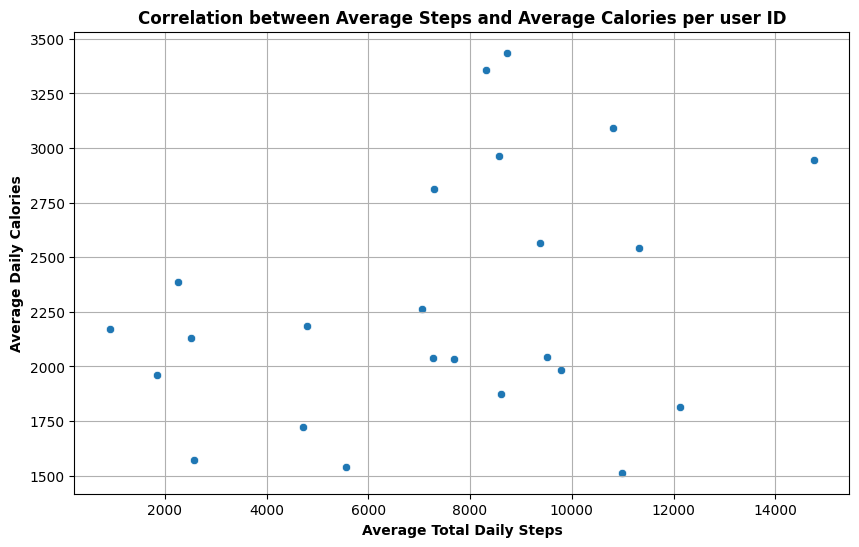

/tmp/ipython-input-3674391957.py:40: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Avg_Minutes_Asleep', y='Avg_Calories', data=final_summary_by_id, palette='viridis')


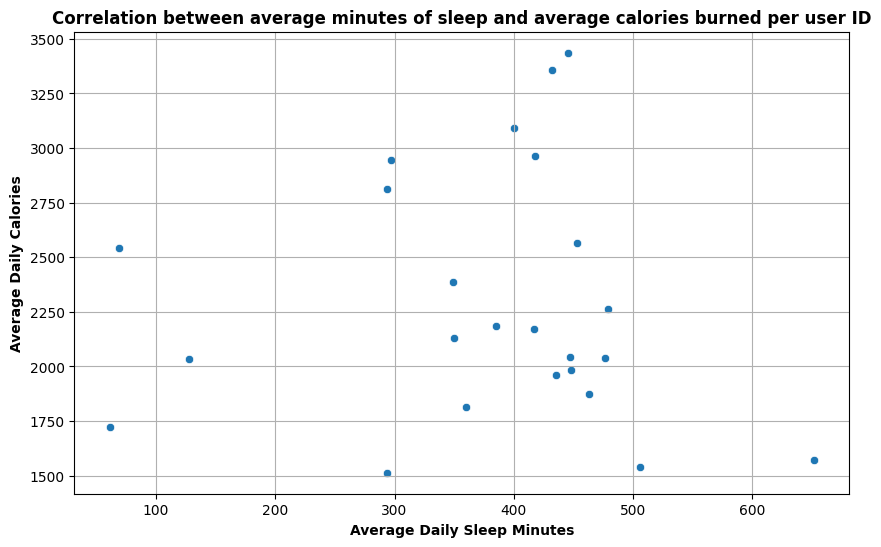

/tmp/ipython-input-3674391957.py:49: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Avg_Minutes_Asleep', y='Avg_Total_Steps', data=final_summary_by_id, palette='viridis')


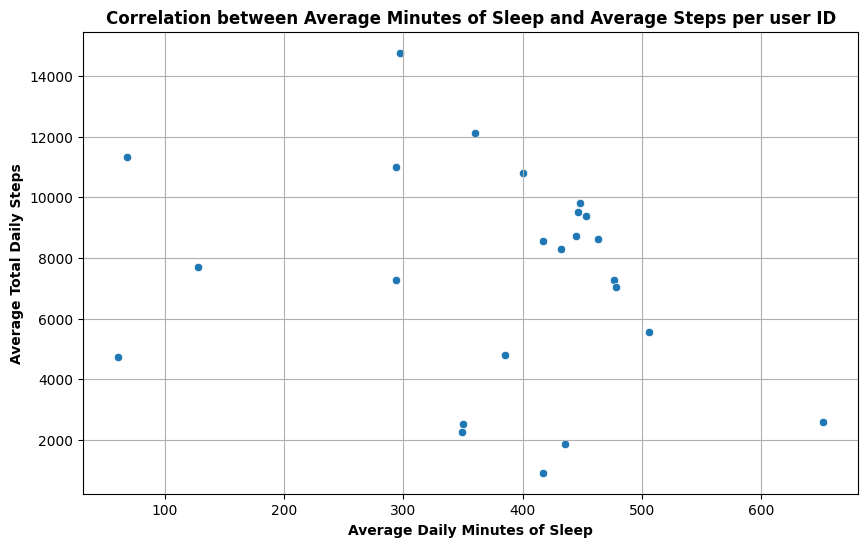

In [ ]:
# Calculating the average minutes of sleep per user
average_sleep_by_id = daily_sleep.groupby('Id')['TotalMinutesAsleep'].mean().reset_index(name='Avg_Minutes_Asleep')

# Hitung rata-rata total langkah per ID (sudah dihitung sebelumnya sebagai average_steps_by_id)
average_steps_by_id = daily_activity.groupby('Id')['TotalSteps'].mean().reset_index(name='Avg_Total_Steps')

# Calculating the average calories burned by each user
average_calories_by_id = daily_activity.groupby('Id')['Calories'].mean().reset_index(name='Avg_Calories')

# Merge average_sleep_by_id and average_steps_by_id based on 'Id'
# Corrected merge operation
merged_sleep_steps = pd.merge(average_sleep_by_id, average_steps_by_id, on='Id', how='inner')

# Merge the previous results with average_calories_by_id based on 'Id'
final_summary_by_id = pd.merge(merged_sleep_steps, average_calories_by_id, on='Id', how='inner')

# Displaying average minutes of sleep, total steps, and calories per user ID
print("\nAverage Minutes of Sleep, Total Steps, and Calories per User ID:")
print(final_summary_by_id.head())

# Information on combined data results
print("\nInformation on combined data results:")
print(final_summary_by_id.info())

# Descriptive statistics of the merger results
print("\nDescriptive statistics of the merger results:")
print(final_summary_by_id.describe())

# Visualizing the correlation between average steps and average calories burned
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_Total_Steps', y='Avg_Calories', data=final_summary_by_id, palette='viridis')
plt.title('Correlation between Average Steps and Average Calories per user ID', fontweight='bold')
plt.xlabel('Average Total Daily Steps', fontweight='bold')
plt.ylabel('Average Daily Calories', fontweight='bold')
plt.grid(True)
plt.show()

# Visualizing the correlation between average minutes of sleep and average calories burned
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_Minutes_Asleep', y='Avg_Calories', data=final_summary_by_id, palette='viridis')
plt.title('Correlation between average minutes of sleep and average calories burned per user ID', fontweight='bold')
plt.xlabel('Average Daily Sleep Minutes', fontweight='bold')
plt.ylabel('Average Daily Calories', fontweight='bold')
plt.grid(True)
plt.show()

# Visualizing the correlation between average minutes of sleep and average steps
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_Minutes_Asleep', y='Avg_Total_Steps', data=final_summary_by_id, palette='viridis')
plt.title('Correlation between Average Minutes of Sleep and Average Steps per user ID', fontweight='bold')
plt.xlabel('Average Daily Minutes of Sleep', fontweight='bold')
plt.ylabel('Average Total Daily Steps', fontweight='bold')
plt.grid(True)
plt.show()

###Average Sleep Duration vs Average Activity Duration by Day of The Week

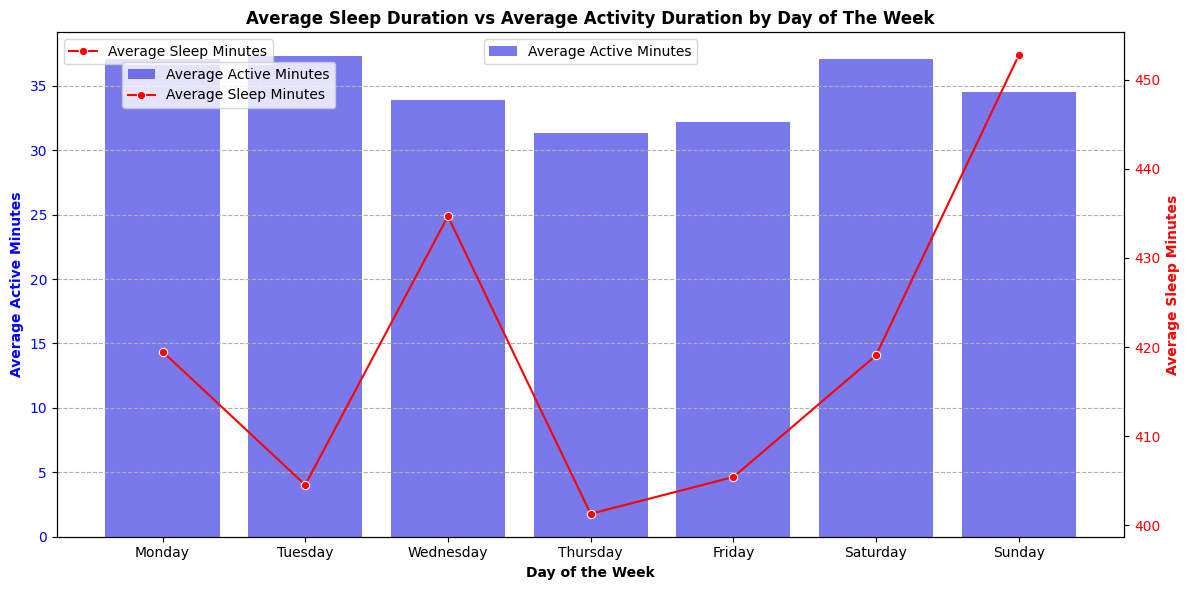

,ActivityDay,Average_TotalActiveMinutes,Average_Minutes_Asleep
0,Monday,37.108333,419.500000
1,Tuesday,37.289474,404.538462
2,Wednesday,33.880000,434.681818
3,Thursday,31.367347,401.296875
4,Friday,32.166667,405.421053
5,Saturday,37.120968,419.070175
6,Sunday,34.512397,452.745455


In [ ]:
# Calculating the average Total Active Minutes per day of the week
average_TotalActiveMinutes_by_day = daily_activity.groupby('ActivityDay')['TotalActiveMinutes'].mean().reset_index(name='Average_TotalActiveMinutes')

# Order the days of the week for average_TotalActiveMinutes_by_day
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_TotalActiveMinutes_by_day['ActivityDay'] = pd.Categorical(average_TotalActiveMinutes_by_day['ActivityDay'], categories=day_order, ordered=True)
average_TotalActiveMinutes_by_day = average_TotalActiveMinutes_by_day.sort_values('ActivityDay')


# Merge the two dataframes on the day of the week
merged_activity_sleep = pd.merge(average_TotalActiveMinutes_by_day, average_sleep_by_day, left_on='ActivityDay', right_on='SleepDay')

# Drop the redundant 'SleepDay' column
merged_activity_sleep = merged_activity_sleep.drop('SleepDay', axis=1)

# Set the order of the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
merged_activity_sleep['ActivityDay'] = pd.Categorical(merged_activity_sleep['ActivityDay'], categories=day_order, ordered=True)
merged_activity_sleep = merged_activity_sleep.sort_values('ActivityDay')

# Create a dual-axis chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Average Total Active Minutes on the left y-axis as a bar chart
sns.barplot(x='ActivityDay', y='Average_TotalActiveMinutes', data=merged_activity_sleep, color='blue', alpha=0.6, ax=ax1, label='Average Active Minutes')
ax1.set_xlabel('Day of the Week', fontweight='bold')
ax1.set_ylabel('Average Active Minutes', color='blue', fontweight='bold')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(axis='y', linestyle='--')

# Create a second y-axis for Average Minutes Asleep
ax2 = ax1.twinx()
sns.lineplot(x='ActivityDay', y='Average_Minutes_Asleep', data=merged_activity_sleep, color='red', marker='o', ax=ax2, label='Average Sleep Minutes')
ax2.set_ylabel('Average Sleep Minutes', color='red', fontweight='bold')
ax2.tick_params(axis='y', labelcolor='red')

# Add a title and legend
plt.title('Average Sleep Duration vs Average Activity Duration by Day of The Week', fontweight='bold')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.tight_layout()
plt.show()

display(merged_activity_sleep)

###Average Sleep Efficiency vs Average Activity Duration by Day of The Week

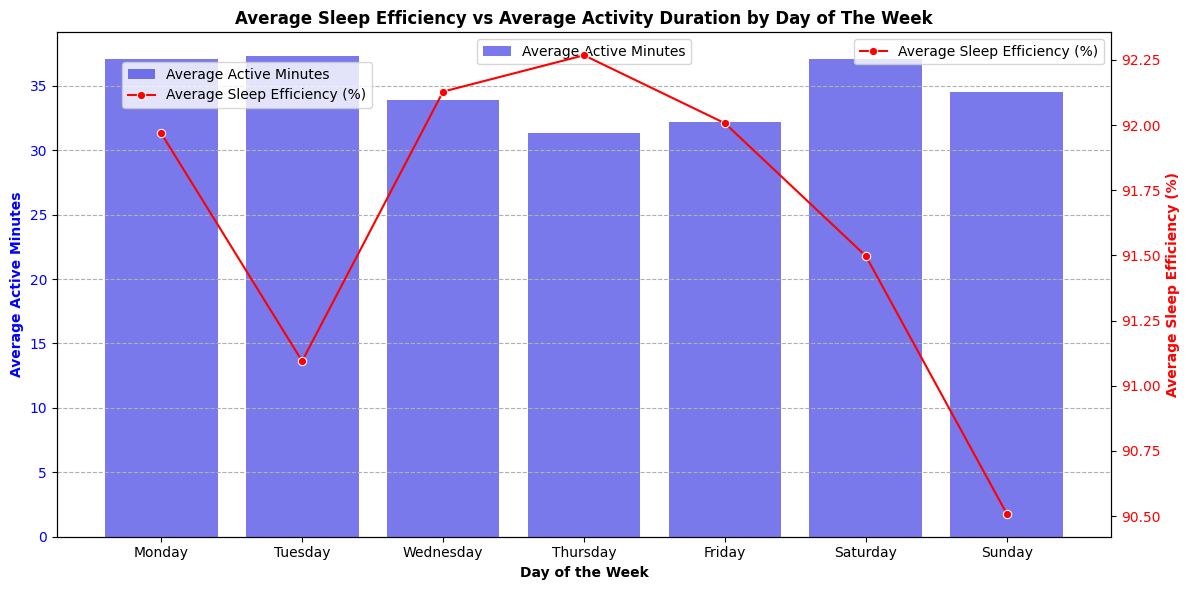

,ActivityDay,Average_TotalActiveMinutes,Average_Sleep_Efficiency
0,Monday,37.108333,91.968621
1,Tuesday,37.289474,91.094809
2,Wednesday,33.880000,92.128525
3,Thursday,31.367347,92.268032
4,Friday,32.166667,92.007138
5,Saturday,37.120968,91.497871
6,Sunday,34.512397,90.508978


In [ ]:
# Merge the two dataframes on the day of the week
merged_activity_sleep_efficiency = pd.merge(average_TotalActiveMinutes_by_day, average_sleep_efficiency_by_day, left_on='ActivityDay', right_on='SleepDay')

# Drop the redundant 'SleepDay' column
merged_activity_sleep_efficiency = merged_activity_sleep_efficiency.drop('SleepDay', axis=1)

# Set the order of the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
merged_activity_sleep_efficiency['ActivityDay'] = pd.Categorical(merged_activity_sleep_efficiency['ActivityDay'], categories=day_order, ordered=True)
merged_activity_sleep_efficiency = merged_activity_sleep_efficiency.sort_values('ActivityDay')

# Create a dual-axis chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Average Total Active Minutes on the left y-axis as a bar chart
sns.barplot(x='ActivityDay', y='Average_TotalActiveMinutes', data=merged_activity_sleep_efficiency, color='blue', alpha=0.6, ax=ax1, label='Average Active Minutes')
ax1.set_xlabel('Day of the Week', fontweight='bold')
ax1.set_ylabel('Average Active Minutes', color='blue', fontweight='bold')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(axis='y', linestyle='--')

# Create a second y-axis for Average Sleep Efficiency
ax2 = ax1.twinx()
sns.lineplot(x='ActivityDay', y='Average_Sleep_Efficiency', data=merged_activity_sleep_efficiency, color='red', marker='o', ax=ax2, label='Average Sleep Efficiency (%)')
ax2.set_ylabel('Average Sleep Efficiency (%)', color='red', fontweight='bold')
ax2.tick_params(axis='y', labelcolor='red')

# Add a title and legend
plt.title('Average Sleep Efficiency vs Average Activity Duration by Day of The Week', fontweight='bold')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.tight_layout()
plt.show()

display(merged_activity_sleep_efficiency)

###Avg TotalSleepRecords vs. Avg TotalMinutesAsleep by day of the week

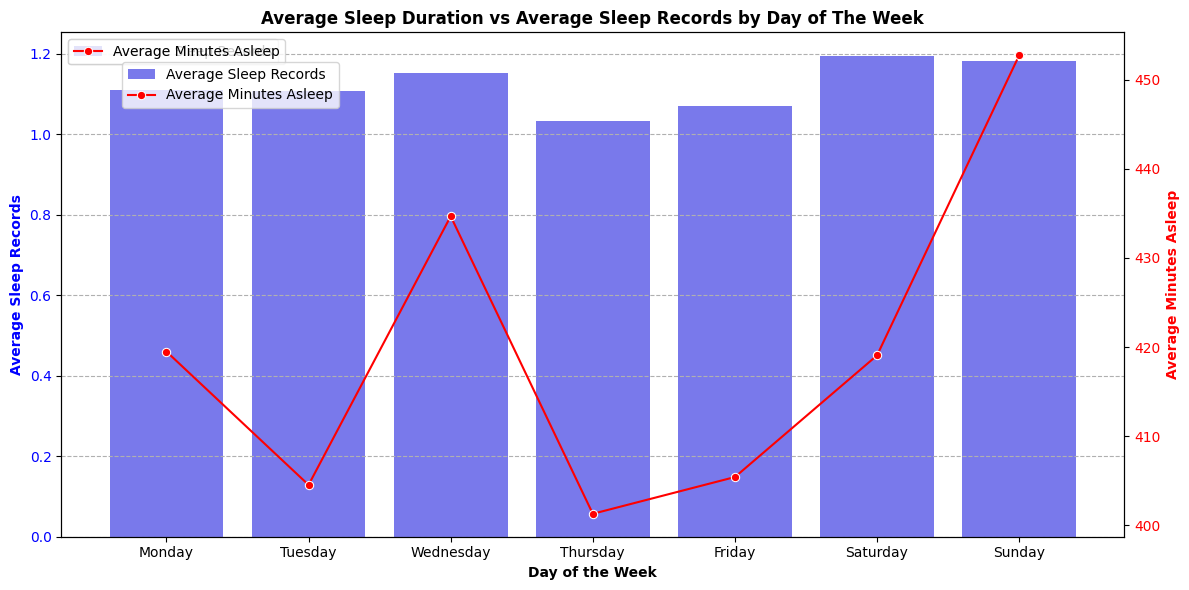

,SleepDay,TotalMinutesAsleep,TotalSleepRecords
1,Monday,419.500000,1.108696
5,Tuesday,404.538462,1.107692
6,Wednesday,434.681818,1.151515
4,Thursday,401.296875,1.031250
0,Friday,405.421053,1.070175
2,Saturday,419.070175,1.192982
3,Sunday,452.745455,1.181818


In [ ]:
# Calculate the average total minutes asleep and average total sleep records per day of the week
average_sleep_records_minutes_by_day = daily_sleep.groupby(daily_sleep['SleepDay'].dt.day_name())[['TotalMinutesAsleep', 'TotalSleepRecords']].mean().reset_index()

# Order the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_sleep_records_minutes_by_day['SleepDay'] = pd.Categorical(average_sleep_records_minutes_by_day['SleepDay'], categories=day_order, ordered=True)
average_sleep_records_minutes_by_day = average_sleep_records_minutes_by_day.sort_values('SleepDay')

# Create a dual-axis chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Average Total Sleep Records on the left y-axis as a bar chart
sns.barplot(x='SleepDay', y='TotalSleepRecords', data=average_sleep_records_minutes_by_day, color='blue', alpha=0.6, ax=ax1, label='Average Sleep Records')
ax1.set_xlabel('Day of the Week', fontweight='bold')
ax1.set_ylabel('Average Sleep Records', color='blue', fontweight='bold')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(axis='y', linestyle='--')

# Create a second y-axis for Average Total Minutes Asleep
ax2 = ax1.twinx()
sns.lineplot(x='SleepDay', y='TotalMinutesAsleep', data=average_sleep_records_minutes_by_day, color='red', marker='o', ax=ax2, label='Average Minutes Asleep')
ax2.set_ylabel('Average Minutes Asleep', color='red', fontweight='bold')
ax2.tick_params(axis='y', labelcolor='red')

# Add a title and legend
plt.title('Average Sleep Duration vs Average Sleep Records by Day of The Week', fontweight='bold')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.tight_layout()
plt.show()

display(average_sleep_records_minutes_by_day)

##Calories Burned Analysis

###Correlation between Total steps and the number of calories burned (Calories Burned vs. Step Count)

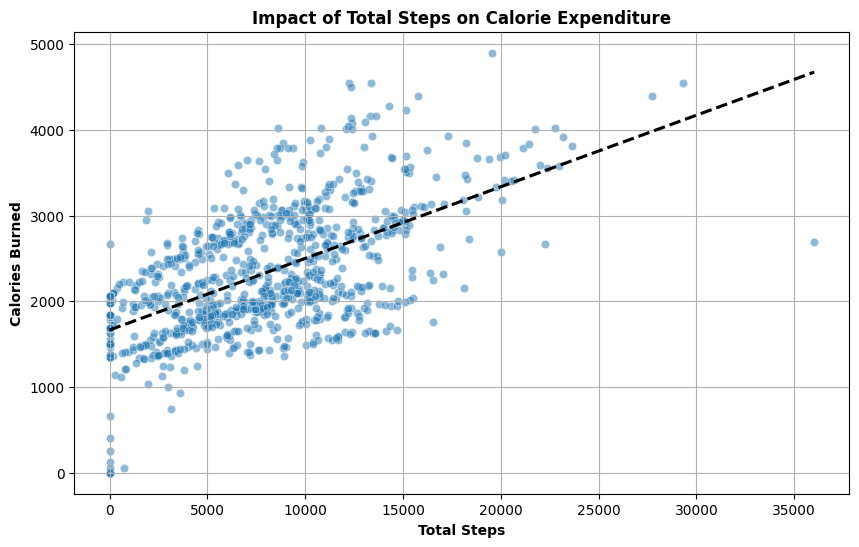

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalSteps', y='Calories', data=daily_activity, alpha=0.5)
sns.regplot(x='TotalSteps', y='Calories', data=daily_activity, scatter=False, color='black', line_kws={'linestyle':'--'}, ci=None)
plt.title('Impact of Total Steps on Calorie Expenditure', fontweight='bold')
plt.xlabel('Total Steps', fontweight='bold')
plt.ylabel('Calories Burned', fontweight='bold')
plt.grid(True)
plt.show()

###Correlation between Total Activity Duration (in minutes) and the number of calories burned

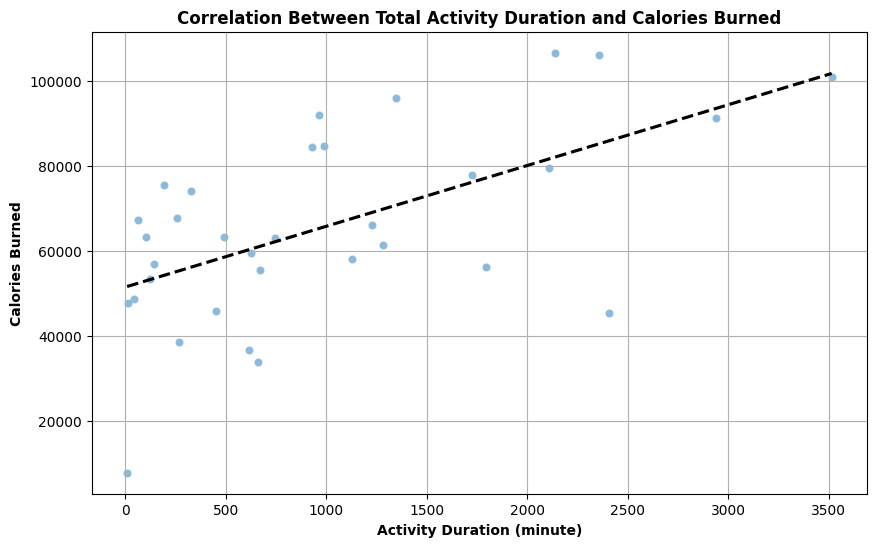

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Active_Minutes', y='TotalCalories', data=how_active_users, alpha=0.5)
sns.regplot(x='Total_Active_Minutes', y='TotalCalories', data=how_active_users, scatter=False, color='black', line_kws={'linestyle':'--'}, ci=None)
plt.title('Correlation Between Total Activity Duration and Calories Burned', fontweight='bold')
plt.xlabel('Activity Duration (minute)', fontweight='bold')
plt.ylabel('Calories Burned', fontweight='bold')
plt.grid(True)
plt.show()

###Correlation between the Total Distance and the number of calories burned

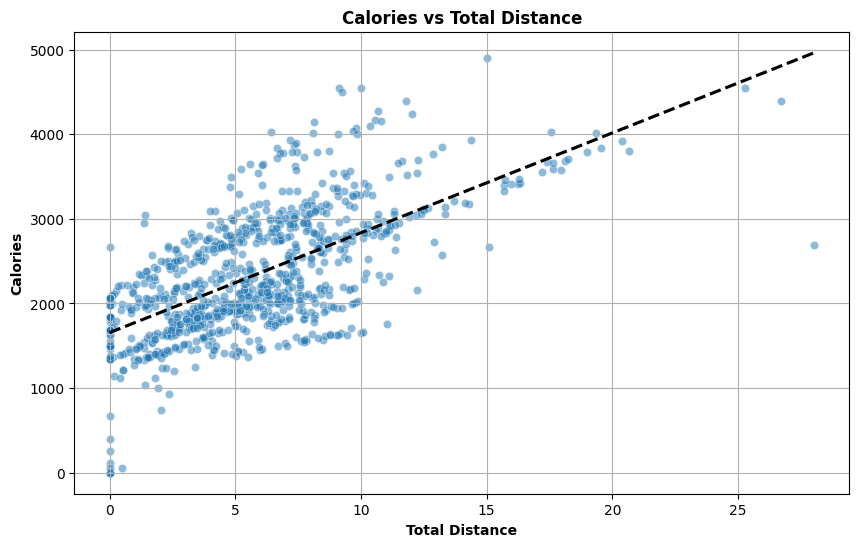

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalDistance', y='Calories', data=daily_activity, alpha=0.5)
sns.regplot(x='TotalDistance', y='Calories', data=daily_activity, scatter=False, color='black', line_kws={'linestyle':'--'}, ci=None)
plt.title('Calories vs Total Distance', fontweight='bold')
plt.xlabel('Total Distance', fontweight='bold')
plt.ylabel('Calories', fontweight='bold')
plt.grid(True)
plt.show()

###Correlation between average calories burned and activity time (in 24 hours)


Houly Average Calories:
    Hour  Average_Calories
0      0         71.805139
1      1         70.165059
2      2         69.186495
3      3         67.538049
4      4         68.261803
5      5         81.708155
6      6         86.996778
7      7         94.477981
8      8        103.337272
9      9        106.142857
10    10        110.460710
11    11        109.806904
12    12        117.197397
13    13        115.309446
14    14        115.732899
15    15        106.637158
16    16        113.327453
17    17        122.752759
18    18        123.492274
19    19        121.484547
20    20        102.357616
21    21         96.056354
22    22         88.265487
23    23         77.593577


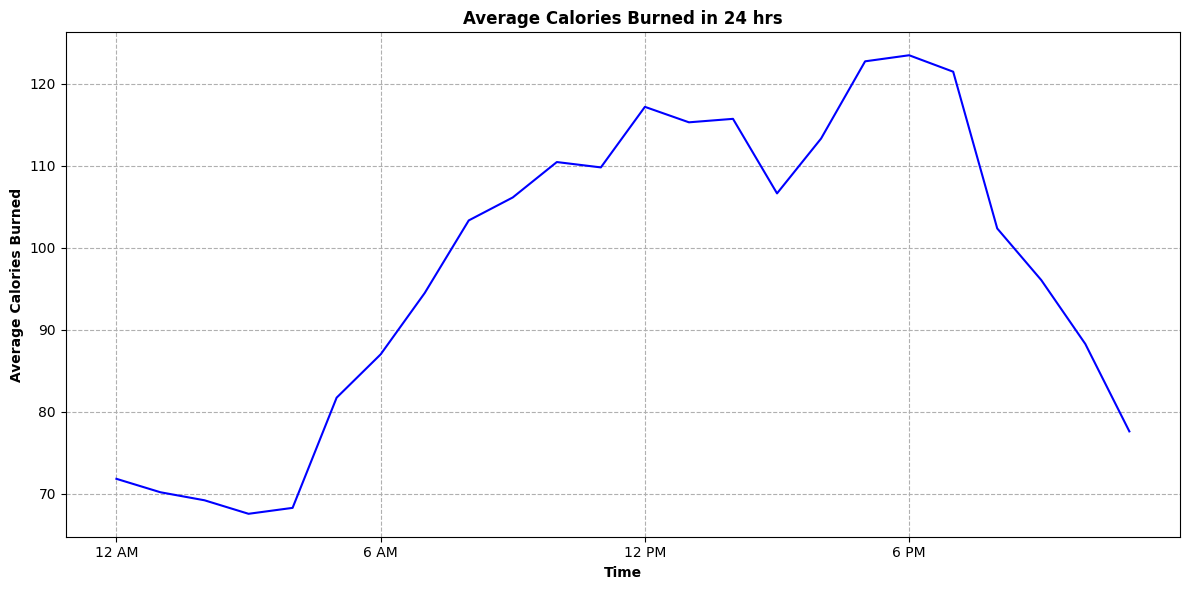

In [ ]:
# Ensure the 'ActivityHour' column is cast to a datetime data type
hourly_calories['ActivityHour'] = pd.to_datetime(hourly_calories['ActivityHour'])

# Extracting Hour data from 'ActivityHour' Column
hourly_calories['Hour'] = hourly_calories['ActivityHour'].dt.hour

# Aggregating Hourly Calorie Data
average_calories_by_hour = hourly_calories.groupby('Hour')['Calories'].mean().reset_index(name='Average_Calories')

# Sorting by Hour
average_calories_by_hour_sorted = average_calories_by_hour.sort_values(by='Hour', ascending=True)

# Showing Result
print("\nHouly Average Calories:")
print(average_calories_by_hour_sorted)

# Visualization: Average Calories by Hour with Smooth Line
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Average_Calories', data=average_calories_by_hour_sorted, color='blue')

plt.title('Average Calories Burned in 24 hrs', fontweight='bold')
plt.xlabel('Time', fontweight='bold')
plt.ylabel('Average Calories Burned', fontweight='bold')

# Configuring X-Axis for Comprehensive Hourly Display with AM/PM format and 6-hour intervals
plt.xticks(range(0, 24, 6), [f'{h%12 or 12}{" AM" if h < 12 else " PM"}' for h in range(0, 24, 6)])

plt.grid(axis='both', linestyle='--') # Modified grid line to include both vertical and horizontal
plt.tight_layout()
plt.show()

###Average Calories Burned by days of week

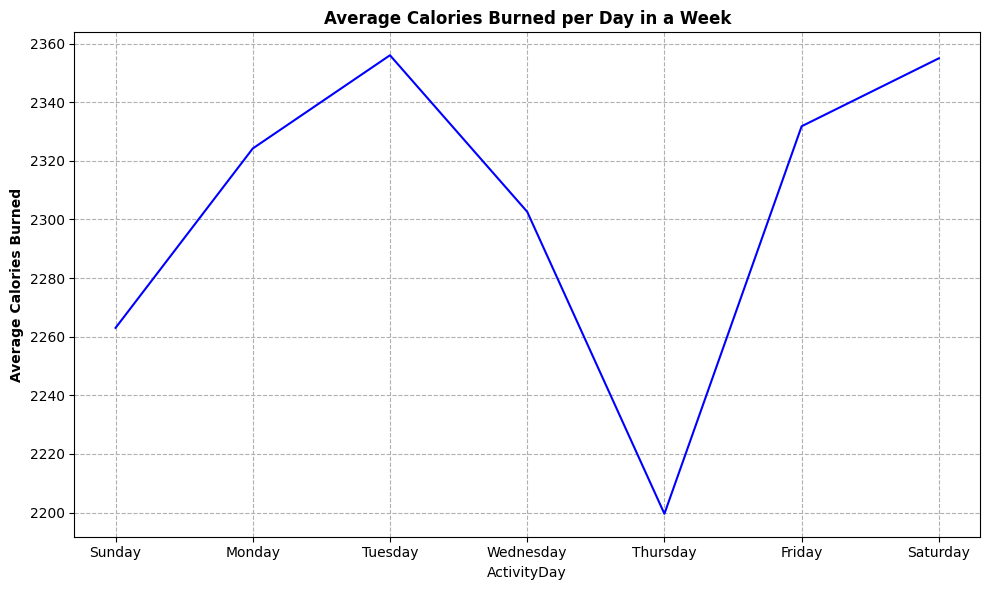

In [ ]:
# Calculating the average calories per day in a week
average_calories_by_day = daily_activity.groupby('ActivityDay')['Calories'].mean().reset_index(name='Average_Calories')

# Sorting the days of the week
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
average_calories_by_day['ActivityDay'] = pd.Categorical(average_calories_by_day['ActivityDay'], categories=day_order, ordered=True)
average_calories_by_day = average_calories_by_day.sort_values('ActivityDay')

# Creating a Line Chart Visualization
plt.figure(figsize=(10, 6))
sns.lineplot(x='ActivityDay', y='Average_Calories', data=average_calories_by_day, color='blue')

plt.title('Average Calories Burned per Day in a Week', fontweight='bold')
plt.ylabel('Average Calories Burned', fontweight='bold')

plt.grid(axis='both', linestyle='--')
plt.tight_layout()

plt.show()

In [ ]:
display(average_calories_by_day)

,ActivityDay,Average_Calories
3,Sunday,2263.000000
1,Monday,2324.208333
5,Tuesday,2356.013158
6,Wednesday,2302.620000
4,Thursday,2199.571429
0,Friday,2331.785714
2,Saturday,2354.967742


##Heart Rate Analysis

###Average Heart Rate by days of week

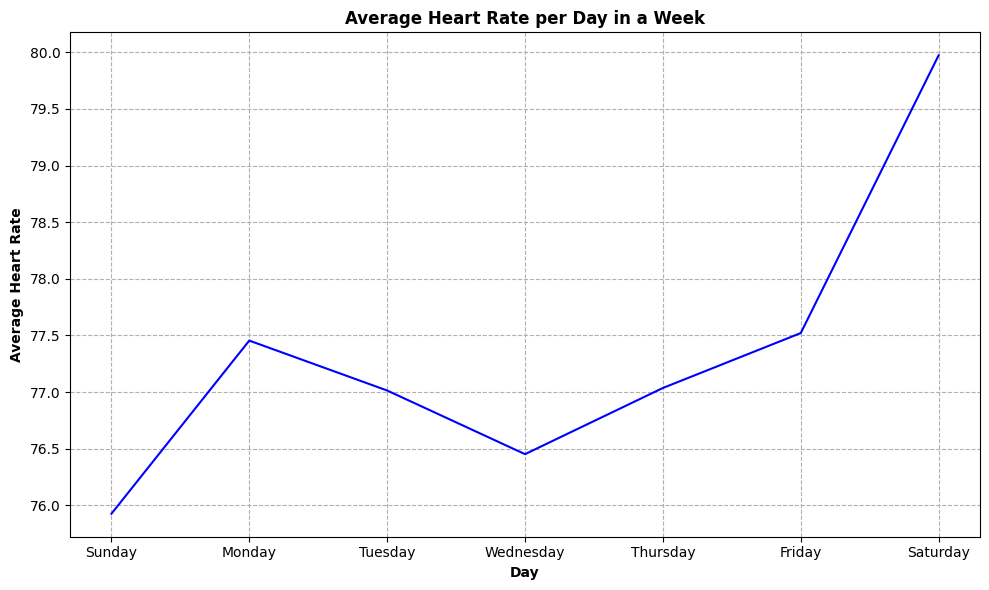

,ActivityDay,Average_Heart_Rate
3,Sunday,75.925004
1,Monday,77.454335
5,Tuesday,77.013723
6,Wednesday,76.451580
4,Thursday,77.035902
0,Friday,77.520836
2,Saturday,79.973815


In [ ]:
# Ensure the 'Time' column in heart_rate is in datetime format
heart_rate['Time'] = pd.to_datetime(heart_rate['Time'])

# Extracting the day of the week from the 'Time' column
heart_rate['ActivityDay'] = heart_rate['Time'].dt.day_name()

# Calculating the average heart rate per day of the week
average_heart_rate_by_day = heart_rate.groupby('ActivityDay')['heartrate'].mean().reset_index(name='Average_Heart_Rate')

# Ordering the days of the week
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
average_heart_rate_by_day['ActivityDay'] = pd.Categorical(average_heart_rate_by_day['ActivityDay'], categories=day_order, ordered=True)
average_heart_rate_by_day = average_heart_rate_by_day.sort_values('ActivityDay')

# Creating the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='ActivityDay', y='Average_Heart_Rate', data=average_heart_rate_by_day, color='blue')

plt.title('Average Heart Rate per Day in a Week', fontweight='bold')
plt.xlabel('Day', fontweight='bold')
plt.ylabel('Average Heart Rate', fontweight='bold')

plt.grid(axis='both', linestyle='--')
plt.tight_layout()
plt.show()

display(average_heart_rate_by_day)

##Average Weight Log and BMI Analysis

###Average of Weight vs Average of BMI per User ID

BMI is a measure used to assess a person's nutritional status by comparing their weight to their height. The [WHO](https://https://www.researchgate.net/publication/236940946_Role_of_Obesity_in_Asthma_Control_the_Obesity-Asthma_Phenotype) has categorized nutritional status based on BMI in adults:
*   Underweight: less than 18,5
*   Normal: between 18,5 and 24,9
*   Overweight: above or equal to 25
*   Obesity: above or equal to 30

In [ ]:
# Calculate the average WeightKg and average BMI per user ID
average_weight_bmi_by_id = weightlog_info.groupby('Id')[['WeightKg', 'BMI']].mean().reset_index()

def classify_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi <= 24.9:
        return 'Normal'
    elif 25 <= bmi <= 29.9:
        return 'Overweight'
    elif bmi >= 30:
        return 'Obesity'
    else:
        return 'Unknown'

average_weight_bmi_by_id['Category'] = average_weight_bmi_by_id['BMI'].apply(classify_bmi)

print("\nAverage Weight, BMI, and WHO Category per User ID:")
display(average_weight_bmi_by_id)


Average Weight, BMI, and WHO Category per User ID:


,Id,WeightKg,BMI,Category
0,1503960366,52.600000,22.650000,Normal
1,1927972279,133.500000,47.540000,Obesity
2,2873212765,57.000000,21.570000,Normal
3,4319703577,72.350000,27.415000,Overweight
4,4558609924,69.640000,27.214000,Overweight
5,5577150313,90.700000,28.000000,Overweight
6,6962181067,61.553333,24.028000,Normal
7,8877689391,85.145833,25.487083,Overweight


###Average Daily Steps vs BMI.

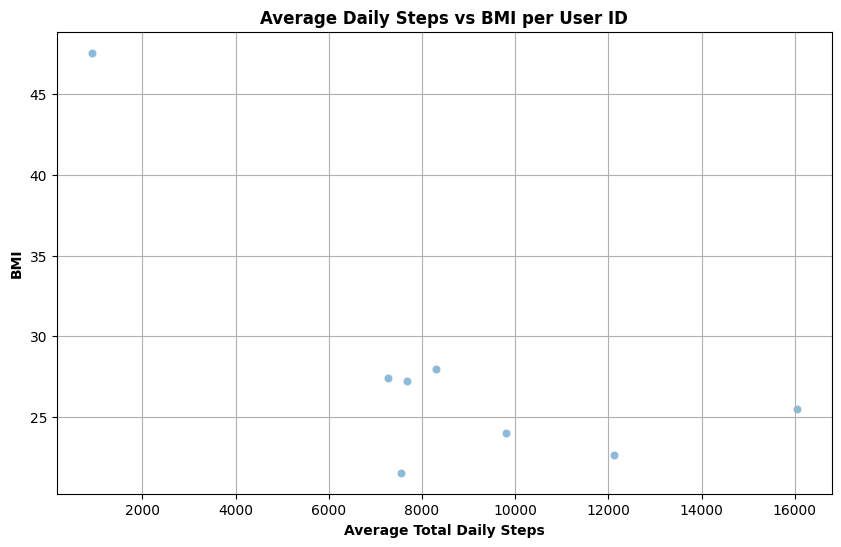

/tmp/ipython-input-957102788.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Step_Category', y='Average_BMI', data=average_bmi_by_step_category, palette='viridis')


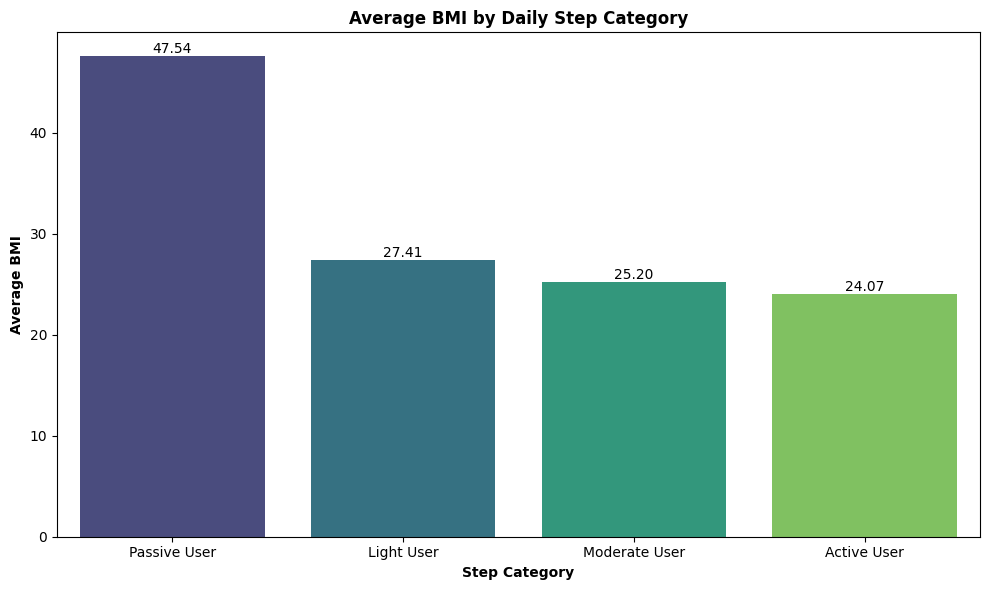

,Step_Category,Average_BMI
3,Passive User,47.540000
1,Light User,27.415000
2,Moderate User,25.203000
0,Active User,24.068542


In [ ]:
# Merge average_steps_by_id with average_weight_bmi_by_id on 'Id'
merged_steps_bmi = pd.merge(average_steps_by_id, average_weight_bmi_by_id, on='Id', how='inner')

# Scatter plot of Average Total Steps vs BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_Total_Steps', y='BMI', data=merged_steps_bmi, alpha=0.5)
plt.title('Average Daily Steps vs BMI per User ID', fontweight='bold')
plt.xlabel('Average Total Daily Steps', fontweight='bold')
plt.ylabel('BMI', fontweight='bold')
plt.grid(True)
plt.show()

# Categorizing users by average daily steps (already defined in a previous cell but redefining for clarity here)
def categorize_steps(steps):
    if 0 <= steps <= 4999:
        return 'Passive User'
    elif 5000 <= steps <= 7499:
        return 'Light User'
    elif 7500 <= steps <= 9999:
        return 'Moderate User'
    elif steps >= 10000:
        return 'Active User'
    else:
        return 'Unknown'

merged_steps_bmi['Step_Category'] = merged_steps_bmi['Avg_Total_Steps'].apply(categorize_steps)

# Calculate average BMI per step category
average_bmi_by_step_category = merged_steps_bmi.groupby('Step_Category')['BMI'].mean().reset_index(name='Average_BMI')

# Define the order of step categories for plotting
category_order = ['Passive User', 'Light User', 'Moderate User', 'Active User']
average_bmi_by_step_category['Step_Category'] = pd.Categorical(average_bmi_by_step_category['Step_Category'], categories=category_order, ordered=True)
average_bmi_by_step_category = average_bmi_by_step_category.sort_values('Step_Category')


# Bar chart to compare average BMI by step category
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Step_Category', y='Average_BMI', data=average_bmi_by_step_category, palette='viridis')
plt.title('Average BMI by Daily Step Category', fontweight='bold')
plt.xlabel('Step Category', fontweight='bold')
plt.ylabel('Average BMI', fontweight='bold')
#plt.grid(axis='y', linestyle='--') # Remove grid lines

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

display(average_bmi_by_step_category)